# TRISEP ML tutorial part II: Building your first fully connected network and a CNN 

## Building a simple fully connected network (a Multi-Layer Perceptron)

Let's set up the paths and make a dataset again:

In [1]:
import os,sys
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from utils.data_handling import WCH5Dataset

In [3]:
dset=WCH5Dataset("/data/TRISEP_data/NUPRISM.h5",val_split=0.1,test_split=0.1)

Now Let's make our model. We'll talk about 
  - model parameters
  - inputs and the forward method
  - Modules containing modules
  - Sequential Module  
  Lets open [simpleMLP](/edit/models/simpleMLP.py)

In [4]:
from models.simpleMLP import SimpleMLP

In [5]:
model_MLP=SimpleMLP(num_classes=3)

Let's look at the parameters:

In [6]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

name of a parameter: fc1.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc1.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc2.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc2.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc3.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc3.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc4.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc4.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc5.weight, type: <class 'torch.nn.parameter.Parameter'>, p

As we can see by default the parameters have `requires_grad` set - i.e. we will be able to obtain gradient of the loss function with respect to these parameters.

Let's quickly look at the [source](https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html#Linear) for the linear module

The parameters descend from the `Tensor` class. When `Parameter` object is instantiated as a member of a `Module` object class the parameter is added to `Module`s list of parameters automatically. This list and values are captured in the 'state dictionary' of a module:

In [7]:
model_MLP.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-2.5770e-03,  1.1668e-03,  1.2516e-03,  ...,  3.4451e-03,
                       -2.6268e-03,  1.1879e-03],
                      [-4.4164e-03,  3.6374e-03,  3.0509e-03,  ..., -5.9236e-03,
                        9.2352e-05,  6.2923e-04],
                      [ 1.6561e-03, -2.8206e-03,  1.4150e-03,  ...,  5.0314e-03,
                        4.8658e-03, -1.5193e-04],
                      ...,
                      [-2.0951e-04,  5.7977e-03,  1.9322e-04,  ...,  4.1630e-03,
                        4.4108e-03,  3.2787e-03],
                      [ 5.2427e-03, -2.5303e-03,  1.1431e-03,  ..., -1.6227e-03,
                        2.2662e-03,  4.5596e-03],
                      [-5.3597e-03, -8.9660e-04, -5.4451e-03,  ...,  1.6994e-03,
                        2.2812e-03,  9.8101e-04]])),
             ('fc1.bias',
              tensor([-0.0057,  0.0056, -0.0054,  ..., -0.0024, -0.0032, -0.0003])),
             ('fc2.weight',
              ten

Now let's look at sequential version

In [8]:
from models.simpleMLP import SimpleMLPSEQ
model_MLPSEQ=SimpleMLPSEQ(num_classes=3)

In [9]:
for name, param in model_MLPSEQ.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

name of a parameter: _sequence.0.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.0.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.2.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.2.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.4.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.4.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.6.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.6.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parame

In [10]:
print(model_MLPSEQ.state_dict())

OrderedDict([('_sequence.0.weight', tensor([[-5.8960e-04,  3.8363e-03, -4.2208e-03,  ...,  3.8289e-03,
         -3.6084e-03, -5.0024e-03],
        [-6.1895e-03, -5.5856e-03,  2.6803e-03,  ...,  5.6518e-03,
         -1.6856e-03,  2.1435e-03],
        [ 4.3089e-03, -1.6170e-04,  1.1000e-03,  ...,  5.2584e-03,
          1.1571e-04, -2.8301e-03],
        ...,
        [ 4.2916e-03, -4.5905e-03, -1.8063e-03,  ...,  2.5200e-03,
          5.9811e-03, -1.9299e-05],
        [-1.1671e-03, -1.7291e-03, -1.7528e-03,  ...,  6.0412e-03,
         -4.2059e-04, -7.5314e-04],
        [ 5.5620e-03,  2.7586e-03,  5.6581e-03,  ..., -6.0608e-03,
          6.3852e-03,  9.6294e-04]])), ('_sequence.0.bias', tensor([ 0.0063,  0.0050, -0.0035,  ..., -0.0057,  0.0008, -0.0042])), ('_sequence.2.weight', tensor([[-0.0002, -0.0095, -0.0076,  ...,  0.0077, -0.0041, -0.0061],
        [ 0.0012,  0.0005, -0.0085,  ..., -0.0047, -0.0025,  0.0060],
        [-0.0020,  0.0044,  0.0054,  ..., -0.0066,  0.0080,  0.0017],
     

As we can see the parameters look similar but have different names

## Training a model

First let's make a dataset object

In [11]:
import numpy as np
transform=np.ravel
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",reduced_dataset_size=50000,val_split=0.1,test_split=0.1,transform=transform)

Reduced size: 50000


Let's make a dataloader and grab a first batch

In [12]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

train_dldr=DataLoader(dset,
                      batch_size=32,
                      shuffle=False,
                      sampler=SubsetRandomSampler(dset.train_indices))
train_iter=iter(train_dldr)

In [13]:
batch0=next(train_iter)

In [14]:
data=batch0[0]
labels=batch0[1]

Now compute the model output on the data

In [15]:
model_out=model_MLP(data)

Now we have model's predictions and we above got 'true' labels from the dataset, so we can now compute the loss - CrossEntropyLoss is the apropropriate one to use here. We will use `CrossEntropyLoss` from `torch.nn` - btw it is also a `Module`. First create it:

In [16]:
from torch.nn import CrossEntropyLoss
loss_module=CrossEntropyLoss()

Now evaluate the loss. 

In [17]:
loss_tensor=loss_module(model_out,labels)

This was a 'forward pass'. We should now have a computational graph available - let's plot it for the kicks...

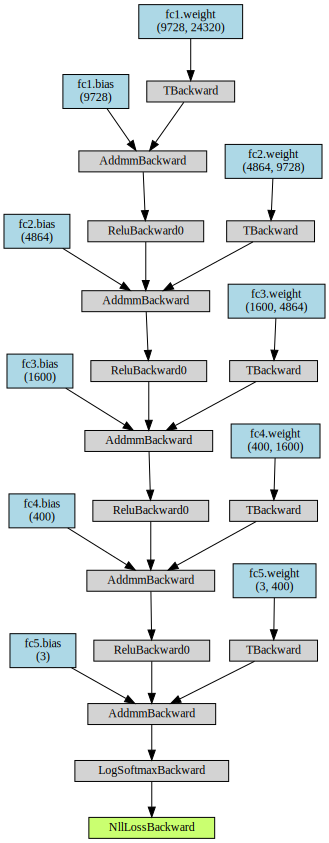

In [18]:
from torchviz import make_dot
make_dot(loss_tensor,params=dict(model_MLP.named_parameters()))

Before we calculate the gradients - let's check what they are now...

In [19]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, gradient: {}".
          format(name, param.grad))

name of a parameter: fc1.weight, gradient: None
name of a parameter: fc1.bias, gradient: None
name of a parameter: fc2.weight, gradient: None
name of a parameter: fc2.bias, gradient: None
name of a parameter: fc3.weight, gradient: None
name of a parameter: fc3.bias, gradient: None
name of a parameter: fc4.weight, gradient: None
name of a parameter: fc4.bias, gradient: None
name of a parameter: fc5.weight, gradient: None
name of a parameter: fc5.bias, gradient: None


No wonder - let's calculate them

In [20]:
loss_tensor.backward()

In [21]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, gradient: {}".
          format(name, param.grad))

name of a parameter: fc1.weight, gradient: tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0062,  0.0080,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0147,  0.0269,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0325,  0.0336,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0132,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0116,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0024,  0.0032,  0.0000]])
name of a parameter: fc1.bias, gradient: tensor([-3.7555e-05,  1.0887e-04, -3.9277e-05,  ...,  2.2238e-05,
         1.5283e-04, -2.1217e-05])
name of a parameter: fc2.weight, gradient: tensor([[-0.0352,  0.0001, -0.0344,  ...,  0.0032, -0.0279, -0.0447],
        [-0.0212, -0.0178, -0.0067,  ...,  0.0025, -0.0291, -0.0183],
        [-0.0027,  0.0046,  0.0011,  ..., -0.0009, -0.0034, -0.0041],
        ...,
        [-0.0349, -0.0252, -0.0222,  ..., -0.0011, -0.0458, -0.0029],
        [-0.0468, -0.0448, -0.0064,  ..., -0.

All we have to do now is subtract the gradient of a given parameter from the parameter tensor itself and do it for all parameters of the model - that should decrease the loss. Normally the gradient is multiplied by a learning rate parameter $\lambda$ so we don't go too far in the loss landscape

In [22]:
lr=0.0001
for param in model_MLP.parameters():
    param.data.add_(-lr*param.grad.data)

call to backward **accumulates** gradients - so we also need to zero the gradient tensors if we want to keep going

In [23]:
for param in model_MLP.parameters():
    param.grad.data.zero_()

There is a much simpler way of doing this - we can use the pytorch [optim](https://pytorch.org/docs/stable/optim.html) classes. This allows us to easily use more advanced optimization options (like momentum or adaptive optimizers like [Adam](https://arxiv.org/abs/1412.6980)):

In [24]:
from torch import optim
optimizer = optim.SGD(model_MLP.parameters(), lr=0.0001)

Lets get a new batch of events

In [25]:
batch1=next(train_iter)

In [26]:
data=batch0[0]
labels=batch0[1]

In [27]:
model_out=model_MLP(data)
loss_tensor=loss_module(model_out,labels)
loss_tensor.backward()
optimizer.step()

We could just put the code above in a loop and be done with it, but the usual practice would be to wrap this functionality in a training object. Here we'll use the [engine](/edit/utils/engine.py) class. Let's examine it. We'll talk about:
  1. Implementation of the training loop
  2. Evaluation on validation set and training and test modes.
  3. Turning evaluation of gradients on and off.
  4. Saving and retrieving the model and optimizer state.

In [28]:
from utils.engine import Engine

Let's first create a configuration object -we'll use this to set up our training engine

In [29]:
class CONFIG:
    pass
config=CONFIG()
config.batch_size_test = 1024
config.batch_size_train = 32
config.batch_size_val = 2048
config.lr=0.001
config.device = 'gpu'
config.num_workers_train=3
config.num_workers_val=2
config.num_workers_test=2
config.dump_path = '../model_state_dumps'


In [30]:
engine=Engine(model_MLP,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190730_072612/


In [31]:
print(vars(config))

{'batch_size_test': 1024, 'batch_size_train': 32, 'batch_size_val': 2048, 'lr': 0.001, 'device': 'gpu', 'num_workers_train': 3, 'num_workers_val': 2, 'num_workers_test': 2, 'dump_path': '../model_state_dumps'}


In [32]:
%%time
engine.train(epochs=2.5,report_interval=10,valid_interval=100)

Epoch 0 Starting @ 2019-07-30 07:26:12
... Iteration 0 ... Epoch 0.00 ... Validation Loss 7.435 ... Validation Accuracy 0.333
Saved checkpoint as: ../model_state_dumps/20190730_072612/SimpleMLP.pth
best validation loss so far!: 7.4352498054504395
Saved checkpoint as: ../model_state_dumps/20190730_072612/SimpleMLPBEST.pth
... Iteration 1 ... Epoch 0.00 ... Loss 6.414 ... Accuracy 0.375
... Iteration 11 ... Epoch 0.01 ... Loss 1.384 ... Accuracy 0.312
... Iteration 21 ... Epoch 0.02 ... Loss 1.124 ... Accuracy 0.250
... Iteration 31 ... Epoch 0.02 ... Loss 1.051 ... Accuracy 0.469
... Iteration 41 ... Epoch 0.03 ... Loss 0.965 ... Accuracy 0.438
... Iteration 51 ... Epoch 0.04 ... Loss 1.019 ... Accuracy 0.406
... Iteration 61 ... Epoch 0.05 ... Loss 0.997 ... Accuracy 0.375
... Iteration 71 ... Epoch 0.06 ... Loss 0.839 ... Accuracy 0.562
... Iteration 81 ... Epoch 0.06 ... Loss 0.945 ... Accuracy 0.406
... Iteration 91 ... Epoch 0.07 ... Loss 0.994 ... Accuracy 0.344
... Iteration 100 

... Iteration 881 ... Epoch 0.70 ... Loss 0.403 ... Accuracy 0.750
... Iteration 891 ... Epoch 0.71 ... Loss 0.550 ... Accuracy 0.750
starting over on the validation set
... Iteration 900 ... Epoch 0.72 ... Validation Loss 0.489 ... Validation Accuracy 0.708
Saved checkpoint as: ../model_state_dumps/20190730_072612/SimpleMLP.pth
... Iteration 901 ... Epoch 0.72 ... Loss 0.400 ... Accuracy 0.750
... Iteration 911 ... Epoch 0.73 ... Loss 0.520 ... Accuracy 0.688
... Iteration 921 ... Epoch 0.74 ... Loss 0.465 ... Accuracy 0.688
... Iteration 931 ... Epoch 0.74 ... Loss 0.478 ... Accuracy 0.719
... Iteration 941 ... Epoch 0.75 ... Loss 0.679 ... Accuracy 0.500
... Iteration 951 ... Epoch 0.76 ... Loss 0.455 ... Accuracy 0.781
... Iteration 961 ... Epoch 0.77 ... Loss 0.514 ... Accuracy 0.719
... Iteration 971 ... Epoch 0.78 ... Loss 0.513 ... Accuracy 0.688
... Iteration 981 ... Epoch 0.78 ... Loss 0.580 ... Accuracy 0.625
... Iteration 991 ... Epoch 0.79 ... Loss 0.326 ... Accuracy 0.844

... Iteration 1791 ... Epoch 1.43 ... Loss 0.409 ... Accuracy 0.719
... Iteration 1801 ... Epoch 1.44 ... Loss 0.476 ... Accuracy 0.781
... Iteration 1811 ... Epoch 1.45 ... Loss 0.399 ... Accuracy 0.781
... Iteration 1821 ... Epoch 1.46 ... Loss 0.443 ... Accuracy 0.719
... Iteration 1831 ... Epoch 1.46 ... Loss 0.358 ... Accuracy 0.812
... Iteration 1841 ... Epoch 1.47 ... Loss 0.553 ... Accuracy 0.688
... Iteration 1850 ... Epoch 1.48 ... Validation Loss 0.465 ... Validation Accuracy 0.745
Saved checkpoint as: ../model_state_dumps/20190730_072612/SimpleMLP.pth
... Iteration 1851 ... Epoch 1.48 ... Loss 0.402 ... Accuracy 0.844
... Iteration 1861 ... Epoch 1.49 ... Loss 0.436 ... Accuracy 0.750
... Iteration 1871 ... Epoch 1.50 ... Loss 0.340 ... Accuracy 0.875
... Iteration 1881 ... Epoch 1.50 ... Loss 0.348 ... Accuracy 0.812
... Iteration 1891 ... Epoch 1.51 ... Loss 0.412 ... Accuracy 0.812
... Iteration 1901 ... Epoch 1.52 ... Loss 0.505 ... Accuracy 0.750
... Iteration 1911 ...

... Iteration 2741 ... Epoch 2.19 ... Loss 0.201 ... Accuracy 0.938
... Iteration 2751 ... Epoch 2.20 ... Loss 0.316 ... Accuracy 0.812
... Iteration 2761 ... Epoch 2.21 ... Loss 0.243 ... Accuracy 0.938
... Iteration 2771 ... Epoch 2.22 ... Loss 0.317 ... Accuracy 0.875
... Iteration 2781 ... Epoch 2.22 ... Loss 0.240 ... Accuracy 0.906
... Iteration 2791 ... Epoch 2.23 ... Loss 0.142 ... Accuracy 0.969
... Iteration 2800 ... Epoch 2.24 ... Validation Loss 0.498 ... Validation Accuracy 0.738
Saved checkpoint as: ../model_state_dumps/20190730_072612/SimpleMLP.pth
... Iteration 2801 ... Epoch 2.24 ... Loss 0.255 ... Accuracy 0.875
... Iteration 2811 ... Epoch 2.25 ... Loss 0.313 ... Accuracy 0.875
... Iteration 2821 ... Epoch 2.26 ... Loss 0.251 ... Accuracy 0.875
... Iteration 2831 ... Epoch 2.26 ... Loss 0.798 ... Accuracy 0.594
... Iteration 2841 ... Epoch 2.27 ... Loss 0.358 ... Accuracy 0.812
... Iteration 2851 ... Epoch 2.28 ... Loss 0.308 ... Accuracy 0.812
... Iteration 2861 ...

Is the model training?

## Defining a simple Convolutional Network

In [33]:
from models.simpleCNN import SimpleCNN
model_CNN=SimpleCNN(num_input_channels=38,num_classes=3)

In [34]:
def rotate_chan(x):
    return np.transpose(x,(2,0,1))

In [35]:
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",val_split=0.1,test_split=0.1,transform=rotate_chan)

In [36]:
engine=Engine(model_CNN,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190730_072940/


In [37]:
for name, param in model_CNN.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

name of a parameter: f_embed.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_embed.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv1.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv1.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2a.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2a.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2b.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2b.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv3a.weight, type: 

In [38]:
%%time
engine.train(epochs=5,report_interval=10,valid_interval=100)

Epoch 0 Starting @ 2019-07-30 07:29:40
... Iteration 0 ... Epoch 0.00 ... Validation Loss 1.100 ... Validation Accuracy 0.340
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
best validation loss so far!: 1.0999268293380737
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNNBEST.pth
... Iteration 1 ... Epoch 0.00 ... Loss 1.086 ... Accuracy 0.375
... Iteration 11 ... Epoch 0.00 ... Loss 1.083 ... Accuracy 0.406
... Iteration 21 ... Epoch 0.00 ... Loss 1.125 ... Accuracy 0.156
... Iteration 31 ... Epoch 0.00 ... Loss 1.095 ... Accuracy 0.281
... Iteration 41 ... Epoch 0.00 ... Loss 1.078 ... Accuracy 0.406
... Iteration 51 ... Epoch 0.00 ... Loss 1.073 ... Accuracy 0.281
... Iteration 61 ... Epoch 0.00 ... Loss 1.104 ... Accuracy 0.344
... Iteration 71 ... Epoch 0.00 ... Loss 1.092 ... Accuracy 0.250
... Iteration 81 ... Epoch 0.00 ... Loss 1.060 ... Accuracy 0.406
... Iteration 91 ... Epoch 0.00 ... Loss 1.109 ... Accuracy 0.281
... Iteration 100 

... Iteration 871 ... Epoch 0.04 ... Loss 0.582 ... Accuracy 0.688
... Iteration 881 ... Epoch 0.04 ... Loss 0.630 ... Accuracy 0.625
... Iteration 891 ... Epoch 0.04 ... Loss 0.500 ... Accuracy 0.719
... Iteration 900 ... Epoch 0.04 ... Validation Loss 0.609 ... Validation Accuracy 0.684
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
best validation loss so far!: 0.6089707016944885
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNNBEST.pth
... Iteration 901 ... Epoch 0.04 ... Loss 0.624 ... Accuracy 0.594
... Iteration 911 ... Epoch 0.04 ... Loss 0.572 ... Accuracy 0.656
... Iteration 921 ... Epoch 0.04 ... Loss 0.602 ... Accuracy 0.625
... Iteration 931 ... Epoch 0.04 ... Loss 0.552 ... Accuracy 0.688
... Iteration 941 ... Epoch 0.04 ... Loss 0.677 ... Accuracy 0.594
... Iteration 951 ... Epoch 0.04 ... Loss 0.516 ... Accuracy 0.844
... Iteration 961 ... Epoch 0.04 ... Loss 0.585 ... Accuracy 0.625
... Iteration 971 ... Epoch 0.04 ... Loss 0.

... Iteration 1761 ... Epoch 0.08 ... Loss 0.474 ... Accuracy 0.781
... Iteration 1771 ... Epoch 0.08 ... Loss 0.404 ... Accuracy 0.750
... Iteration 1781 ... Epoch 0.08 ... Loss 0.471 ... Accuracy 0.688
... Iteration 1791 ... Epoch 0.08 ... Loss 0.605 ... Accuracy 0.500
... Iteration 1800 ... Epoch 0.08 ... Validation Loss 0.504 ... Validation Accuracy 0.698
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 1801 ... Epoch 0.08 ... Loss 0.435 ... Accuracy 0.719
... Iteration 1811 ... Epoch 0.08 ... Loss 0.481 ... Accuracy 0.750
... Iteration 1821 ... Epoch 0.08 ... Loss 0.543 ... Accuracy 0.781
... Iteration 1831 ... Epoch 0.08 ... Loss 0.454 ... Accuracy 0.812
... Iteration 1841 ... Epoch 0.08 ... Loss 0.324 ... Accuracy 0.844
... Iteration 1851 ... Epoch 0.08 ... Loss 0.377 ... Accuracy 0.844
... Iteration 1861 ... Epoch 0.08 ... Loss 0.548 ... Accuracy 0.656
... Iteration 1871 ... Epoch 0.08 ... Loss 0.519 ... Accuracy 0.812
... Iteration 1881 ...

... Iteration 2721 ... Epoch 0.12 ... Loss 0.268 ... Accuracy 0.812
... Iteration 2731 ... Epoch 0.12 ... Loss 0.319 ... Accuracy 0.750
... Iteration 2741 ... Epoch 0.12 ... Loss 0.441 ... Accuracy 0.812
... Iteration 2751 ... Epoch 0.12 ... Loss 0.545 ... Accuracy 0.656
... Iteration 2761 ... Epoch 0.12 ... Loss 0.381 ... Accuracy 0.781
... Iteration 2771 ... Epoch 0.12 ... Loss 0.536 ... Accuracy 0.688
... Iteration 2781 ... Epoch 0.12 ... Loss 0.372 ... Accuracy 0.812
... Iteration 2791 ... Epoch 0.12 ... Loss 0.375 ... Accuracy 0.812
... Iteration 2800 ... Epoch 0.12 ... Validation Loss 0.456 ... Validation Accuracy 0.737
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 2801 ... Epoch 0.12 ... Loss 0.489 ... Accuracy 0.719
... Iteration 2811 ... Epoch 0.12 ... Loss 0.441 ... Accuracy 0.750
... Iteration 2821 ... Epoch 0.13 ... Loss 0.362 ... Accuracy 0.875
... Iteration 2831 ... Epoch 0.13 ... Loss 0.446 ... Accuracy 0.688
... Iteration 2841 ...

... Iteration 3681 ... Epoch 0.16 ... Loss 0.386 ... Accuracy 0.781
... Iteration 3691 ... Epoch 0.16 ... Loss 0.356 ... Accuracy 0.844
... Iteration 3700 ... Epoch 0.16 ... Validation Loss 0.440 ... Validation Accuracy 0.748
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 3701 ... Epoch 0.16 ... Loss 0.419 ... Accuracy 0.781
... Iteration 3711 ... Epoch 0.16 ... Loss 0.359 ... Accuracy 0.781
... Iteration 3721 ... Epoch 0.17 ... Loss 0.290 ... Accuracy 0.875
... Iteration 3731 ... Epoch 0.17 ... Loss 0.405 ... Accuracy 0.781
... Iteration 3741 ... Epoch 0.17 ... Loss 0.418 ... Accuracy 0.750
... Iteration 3751 ... Epoch 0.17 ... Loss 0.363 ... Accuracy 0.781
... Iteration 3761 ... Epoch 0.17 ... Loss 0.440 ... Accuracy 0.750
... Iteration 3771 ... Epoch 0.17 ... Loss 0.422 ... Accuracy 0.781
... Iteration 3781 ... Epoch 0.17 ... Loss 0.477 ... Accuracy 0.781
... Iteration 3791 ... Epoch 0.17 ... Loss 0.390 ... Accuracy 0.781
... Iteration 3800 ...

... Iteration 4651 ... Epoch 0.21 ... Loss 0.483 ... Accuracy 0.719
... Iteration 4661 ... Epoch 0.21 ... Loss 0.428 ... Accuracy 0.812
... Iteration 4671 ... Epoch 0.21 ... Loss 0.418 ... Accuracy 0.781
... Iteration 4681 ... Epoch 0.21 ... Loss 0.440 ... Accuracy 0.719
... Iteration 4691 ... Epoch 0.21 ... Loss 0.370 ... Accuracy 0.781
... Iteration 4700 ... Epoch 0.21 ... Validation Loss 0.437 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 4701 ... Epoch 0.21 ... Loss 0.429 ... Accuracy 0.719
... Iteration 4711 ... Epoch 0.21 ... Loss 0.372 ... Accuracy 0.781
... Iteration 4721 ... Epoch 0.21 ... Loss 0.567 ... Accuracy 0.719
... Iteration 4731 ... Epoch 0.21 ... Loss 0.490 ... Accuracy 0.688
... Iteration 4741 ... Epoch 0.21 ... Loss 0.440 ... Accuracy 0.750
... Iteration 4751 ... Epoch 0.21 ... Loss 0.404 ... Accuracy 0.781
... Iteration 4761 ... Epoch 0.21 ... Loss 0.453 ... Accuracy 0.688
... Iteration 4771 ...

... Iteration 5621 ... Epoch 0.25 ... Loss 0.385 ... Accuracy 0.844
... Iteration 5631 ... Epoch 0.25 ... Loss 0.522 ... Accuracy 0.781
... Iteration 5641 ... Epoch 0.25 ... Loss 0.414 ... Accuracy 0.812
... Iteration 5651 ... Epoch 0.25 ... Loss 0.450 ... Accuracy 0.688
... Iteration 5661 ... Epoch 0.25 ... Loss 0.262 ... Accuracy 0.969
... Iteration 5671 ... Epoch 0.25 ... Loss 0.563 ... Accuracy 0.656
... Iteration 5681 ... Epoch 0.25 ... Loss 0.378 ... Accuracy 0.719
... Iteration 5691 ... Epoch 0.25 ... Loss 0.415 ... Accuracy 0.875
... Iteration 5700 ... Epoch 0.25 ... Validation Loss 0.452 ... Validation Accuracy 0.752
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 5701 ... Epoch 0.25 ... Loss 0.424 ... Accuracy 0.750
... Iteration 5711 ... Epoch 0.25 ... Loss 0.562 ... Accuracy 0.625
... Iteration 5721 ... Epoch 0.25 ... Loss 0.288 ... Accuracy 0.906
... Iteration 5731 ... Epoch 0.25 ... Loss 0.370 ... Accuracy 0.875
... Iteration 5741 ...

... Iteration 6600 ... Epoch 0.29 ... Validation Loss 0.411 ... Validation Accuracy 0.781
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
best validation loss so far!: 0.41076236963272095
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNNBEST.pth
... Iteration 6601 ... Epoch 0.29 ... Loss 0.519 ... Accuracy 0.719
... Iteration 6611 ... Epoch 0.29 ... Loss 0.388 ... Accuracy 0.844
... Iteration 6621 ... Epoch 0.29 ... Loss 0.392 ... Accuracy 0.781
... Iteration 6631 ... Epoch 0.29 ... Loss 0.465 ... Accuracy 0.719
... Iteration 6641 ... Epoch 0.30 ... Loss 0.521 ... Accuracy 0.688
... Iteration 6651 ... Epoch 0.30 ... Loss 0.415 ... Accuracy 0.812
... Iteration 6661 ... Epoch 0.30 ... Loss 0.494 ... Accuracy 0.688
... Iteration 6671 ... Epoch 0.30 ... Loss 0.406 ... Accuracy 0.812
... Iteration 6681 ... Epoch 0.30 ... Loss 0.500 ... Accuracy 0.688
... Iteration 6691 ... Epoch 0.30 ... Loss 0.327 ... Accuracy 0.844
... Iteration 6700 ... Epoch 0.3

... Iteration 7551 ... Epoch 0.34 ... Loss 0.453 ... Accuracy 0.719
... Iteration 7561 ... Epoch 0.34 ... Loss 0.396 ... Accuracy 0.781
... Iteration 7571 ... Epoch 0.34 ... Loss 0.404 ... Accuracy 0.750
... Iteration 7581 ... Epoch 0.34 ... Loss 0.540 ... Accuracy 0.625
... Iteration 7591 ... Epoch 0.34 ... Loss 0.308 ... Accuracy 0.844
... Iteration 7600 ... Epoch 0.34 ... Validation Loss 0.428 ... Validation Accuracy 0.772
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 7601 ... Epoch 0.34 ... Loss 0.363 ... Accuracy 0.906
... Iteration 7611 ... Epoch 0.34 ... Loss 0.401 ... Accuracy 0.719
... Iteration 7621 ... Epoch 0.34 ... Loss 0.459 ... Accuracy 0.781
... Iteration 7631 ... Epoch 0.34 ... Loss 0.322 ... Accuracy 0.875
... Iteration 7641 ... Epoch 0.34 ... Loss 0.459 ... Accuracy 0.875
... Iteration 7651 ... Epoch 0.34 ... Loss 0.565 ... Accuracy 0.688
... Iteration 7661 ... Epoch 0.34 ... Loss 0.424 ... Accuracy 0.719
... Iteration 7671 ...

... Iteration 8521 ... Epoch 0.38 ... Loss 0.466 ... Accuracy 0.750
... Iteration 8531 ... Epoch 0.38 ... Loss 0.388 ... Accuracy 0.781
... Iteration 8541 ... Epoch 0.38 ... Loss 0.582 ... Accuracy 0.656
... Iteration 8551 ... Epoch 0.38 ... Loss 0.497 ... Accuracy 0.656
... Iteration 8561 ... Epoch 0.38 ... Loss 0.325 ... Accuracy 0.875
... Iteration 8571 ... Epoch 0.38 ... Loss 0.463 ... Accuracy 0.750
... Iteration 8581 ... Epoch 0.38 ... Loss 0.324 ... Accuracy 0.844
... Iteration 8591 ... Epoch 0.38 ... Loss 0.376 ... Accuracy 0.844
... Iteration 8600 ... Epoch 0.38 ... Validation Loss 0.447 ... Validation Accuracy 0.751
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 8601 ... Epoch 0.38 ... Loss 0.519 ... Accuracy 0.688
... Iteration 8611 ... Epoch 0.38 ... Loss 0.437 ... Accuracy 0.719
... Iteration 8621 ... Epoch 0.38 ... Loss 0.343 ... Accuracy 0.875
... Iteration 8631 ... Epoch 0.38 ... Loss 0.590 ... Accuracy 0.812
... Iteration 8641 ...

... Iteration 9500 ... Epoch 0.42 ... Validation Loss 0.418 ... Validation Accuracy 0.772
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 9501 ... Epoch 0.42 ... Loss 0.711 ... Accuracy 0.656
... Iteration 9511 ... Epoch 0.42 ... Loss 0.448 ... Accuracy 0.781
... Iteration 9521 ... Epoch 0.42 ... Loss 0.428 ... Accuracy 0.781
... Iteration 9531 ... Epoch 0.42 ... Loss 0.458 ... Accuracy 0.656
... Iteration 9541 ... Epoch 0.42 ... Loss 0.415 ... Accuracy 0.812
... Iteration 9551 ... Epoch 0.42 ... Loss 0.514 ... Accuracy 0.719
... Iteration 9561 ... Epoch 0.42 ... Loss 0.375 ... Accuracy 0.844
... Iteration 9571 ... Epoch 0.43 ... Loss 0.440 ... Accuracy 0.812
... Iteration 9581 ... Epoch 0.43 ... Loss 0.364 ... Accuracy 0.781
... Iteration 9591 ... Epoch 0.43 ... Loss 0.414 ... Accuracy 0.781
... Iteration 9600 ... Epoch 0.43 ... Validation Loss 0.424 ... Validation Accuracy 0.775
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.

... Iteration 10471 ... Epoch 0.47 ... Loss 0.346 ... Accuracy 0.844
... Iteration 10481 ... Epoch 0.47 ... Loss 0.366 ... Accuracy 0.844
... Iteration 10491 ... Epoch 0.47 ... Loss 0.412 ... Accuracy 0.781
... Iteration 10500 ... Epoch 0.47 ... Validation Loss 0.410 ... Validation Accuracy 0.775
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 10501 ... Epoch 0.47 ... Loss 0.454 ... Accuracy 0.812
... Iteration 10511 ... Epoch 0.47 ... Loss 0.428 ... Accuracy 0.781
... Iteration 10521 ... Epoch 0.47 ... Loss 0.448 ... Accuracy 0.812
... Iteration 10531 ... Epoch 0.47 ... Loss 0.435 ... Accuracy 0.750
... Iteration 10541 ... Epoch 0.47 ... Loss 0.455 ... Accuracy 0.750
... Iteration 10551 ... Epoch 0.47 ... Loss 0.460 ... Accuracy 0.812
... Iteration 10561 ... Epoch 0.47 ... Loss 0.394 ... Accuracy 0.812
... Iteration 10571 ... Epoch 0.47 ... Loss 0.288 ... Accuracy 0.875
... Iteration 10581 ... Epoch 0.47 ... Loss 0.430 ... Accuracy 0.719
... Itera

... Iteration 11441 ... Epoch 0.51 ... Loss 0.527 ... Accuracy 0.688
... Iteration 11451 ... Epoch 0.51 ... Loss 0.274 ... Accuracy 0.875
... Iteration 11461 ... Epoch 0.51 ... Loss 0.398 ... Accuracy 0.781
... Iteration 11471 ... Epoch 0.51 ... Loss 0.384 ... Accuracy 0.719
... Iteration 11481 ... Epoch 0.51 ... Loss 0.321 ... Accuracy 0.844
... Iteration 11491 ... Epoch 0.51 ... Loss 0.337 ... Accuracy 0.781
... Iteration 11500 ... Epoch 0.51 ... Validation Loss 0.450 ... Validation Accuracy 0.745
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 11501 ... Epoch 0.51 ... Loss 0.407 ... Accuracy 0.719
... Iteration 11511 ... Epoch 0.51 ... Loss 0.511 ... Accuracy 0.688
... Iteration 11521 ... Epoch 0.51 ... Loss 0.573 ... Accuracy 0.688
... Iteration 11531 ... Epoch 0.51 ... Loss 0.350 ... Accuracy 0.781
... Iteration 11541 ... Epoch 0.51 ... Loss 0.417 ... Accuracy 0.750
... Iteration 11551 ... Epoch 0.51 ... Loss 0.525 ... Accuracy 0.625
... Itera

... Iteration 12421 ... Epoch 0.55 ... Loss 0.524 ... Accuracy 0.594
... Iteration 12431 ... Epoch 0.55 ... Loss 0.510 ... Accuracy 0.781
... Iteration 12441 ... Epoch 0.55 ... Loss 0.379 ... Accuracy 0.844
... Iteration 12451 ... Epoch 0.55 ... Loss 0.409 ... Accuracy 0.719
... Iteration 12461 ... Epoch 0.55 ... Loss 0.549 ... Accuracy 0.719
... Iteration 12471 ... Epoch 0.55 ... Loss 0.419 ... Accuracy 0.750
... Iteration 12481 ... Epoch 0.55 ... Loss 0.421 ... Accuracy 0.844
... Iteration 12491 ... Epoch 0.56 ... Loss 0.352 ... Accuracy 0.844
... Iteration 12500 ... Epoch 0.56 ... Validation Loss 0.428 ... Validation Accuracy 0.765
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 12501 ... Epoch 0.56 ... Loss 0.350 ... Accuracy 0.844
... Iteration 12511 ... Epoch 0.56 ... Loss 0.361 ... Accuracy 0.844
... Iteration 12521 ... Epoch 0.56 ... Loss 0.409 ... Accuracy 0.844
... Iteration 12531 ... Epoch 0.56 ... Loss 0.389 ... Accuracy 0.812
... Itera

... Iteration 13391 ... Epoch 0.60 ... Loss 0.433 ... Accuracy 0.719
... Iteration 13400 ... Epoch 0.60 ... Validation Loss 0.406 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 13401 ... Epoch 0.60 ... Loss 0.451 ... Accuracy 0.750
... Iteration 13411 ... Epoch 0.60 ... Loss 0.393 ... Accuracy 0.750
... Iteration 13421 ... Epoch 0.60 ... Loss 0.254 ... Accuracy 0.906
... Iteration 13431 ... Epoch 0.60 ... Loss 0.367 ... Accuracy 0.781
... Iteration 13441 ... Epoch 0.60 ... Loss 0.358 ... Accuracy 0.875
... Iteration 13451 ... Epoch 0.60 ... Loss 0.432 ... Accuracy 0.750
... Iteration 13461 ... Epoch 0.60 ... Loss 0.411 ... Accuracy 0.844
... Iteration 13471 ... Epoch 0.60 ... Loss 0.399 ... Accuracy 0.812
... Iteration 13481 ... Epoch 0.60 ... Loss 0.330 ... Accuracy 0.906
... Iteration 13491 ... Epoch 0.60 ... Loss 0.315 ... Accuracy 0.906
... Iteration 13500 ... Epoch 0.60 ... Validation Loss 0.402 ... Validation Ac

... Iteration 14351 ... Epoch 0.64 ... Loss 0.390 ... Accuracy 0.781
... Iteration 14361 ... Epoch 0.64 ... Loss 0.390 ... Accuracy 0.844
... Iteration 14371 ... Epoch 0.64 ... Loss 0.285 ... Accuracy 0.938
... Iteration 14381 ... Epoch 0.64 ... Loss 0.307 ... Accuracy 0.781
... Iteration 14391 ... Epoch 0.64 ... Loss 0.413 ... Accuracy 0.719
... Iteration 14400 ... Epoch 0.64 ... Validation Loss 0.434 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 14401 ... Epoch 0.64 ... Loss 0.514 ... Accuracy 0.719
... Iteration 14411 ... Epoch 0.64 ... Loss 0.418 ... Accuracy 0.750
... Iteration 14421 ... Epoch 0.64 ... Loss 0.416 ... Accuracy 0.781
... Iteration 14431 ... Epoch 0.64 ... Loss 0.318 ... Accuracy 0.875
... Iteration 14441 ... Epoch 0.64 ... Loss 0.371 ... Accuracy 0.781
... Iteration 14451 ... Epoch 0.64 ... Loss 0.399 ... Accuracy 0.781
... Iteration 14461 ... Epoch 0.64 ... Loss 0.404 ... Accuracy 0.750
... Itera

... Iteration 15321 ... Epoch 0.68 ... Loss 0.447 ... Accuracy 0.750
... Iteration 15331 ... Epoch 0.68 ... Loss 0.277 ... Accuracy 0.844
... Iteration 15341 ... Epoch 0.68 ... Loss 0.393 ... Accuracy 0.812
... Iteration 15351 ... Epoch 0.68 ... Loss 0.326 ... Accuracy 0.875
... Iteration 15361 ... Epoch 0.68 ... Loss 0.370 ... Accuracy 0.844
... Iteration 15371 ... Epoch 0.68 ... Loss 0.537 ... Accuracy 0.625
... Iteration 15381 ... Epoch 0.68 ... Loss 0.408 ... Accuracy 0.812
... Iteration 15391 ... Epoch 0.68 ... Loss 0.451 ... Accuracy 0.719
... Iteration 15400 ... Epoch 0.68 ... Validation Loss 0.471 ... Validation Accuracy 0.743
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 15401 ... Epoch 0.68 ... Loss 0.341 ... Accuracy 0.844
... Iteration 15411 ... Epoch 0.68 ... Loss 0.379 ... Accuracy 0.812
... Iteration 15421 ... Epoch 0.69 ... Loss 0.501 ... Accuracy 0.781
... Iteration 15431 ... Epoch 0.69 ... Loss 0.442 ... Accuracy 0.812
... Itera

... Iteration 16300 ... Epoch 0.72 ... Validation Loss 0.402 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 16301 ... Epoch 0.72 ... Loss 0.582 ... Accuracy 0.719
... Iteration 16311 ... Epoch 0.72 ... Loss 0.359 ... Accuracy 0.781
... Iteration 16321 ... Epoch 0.73 ... Loss 0.474 ... Accuracy 0.688
... Iteration 16331 ... Epoch 0.73 ... Loss 0.383 ... Accuracy 0.875
... Iteration 16341 ... Epoch 0.73 ... Loss 0.404 ... Accuracy 0.844
... Iteration 16351 ... Epoch 0.73 ... Loss 0.466 ... Accuracy 0.750
... Iteration 16361 ... Epoch 0.73 ... Loss 0.396 ... Accuracy 0.719
... Iteration 16371 ... Epoch 0.73 ... Loss 0.496 ... Accuracy 0.719
... Iteration 16381 ... Epoch 0.73 ... Loss 0.383 ... Accuracy 0.812
... Iteration 16391 ... Epoch 0.73 ... Loss 0.433 ... Accuracy 0.656
... Iteration 16400 ... Epoch 0.73 ... Validation Loss 0.411 ... Validation Accuracy 0.790
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 17261 ... Epoch 0.77 ... Loss 0.405 ... Accuracy 0.750
... Iteration 17271 ... Epoch 0.77 ... Loss 0.372 ... Accuracy 0.844
... Iteration 17281 ... Epoch 0.77 ... Loss 0.450 ... Accuracy 0.719
... Iteration 17291 ... Epoch 0.77 ... Loss 0.458 ... Accuracy 0.750
... Iteration 17300 ... Epoch 0.77 ... Validation Loss 0.416 ... Validation Accuracy 0.774
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 17301 ... Epoch 0.77 ... Loss 0.508 ... Accuracy 0.656
... Iteration 17311 ... Epoch 0.77 ... Loss 0.264 ... Accuracy 0.906
... Iteration 17321 ... Epoch 0.77 ... Loss 0.401 ... Accuracy 0.875
... Iteration 17331 ... Epoch 0.77 ... Loss 0.288 ... Accuracy 0.938
... Iteration 17341 ... Epoch 0.77 ... Loss 0.455 ... Accuracy 0.656
... Iteration 17351 ... Epoch 0.77 ... Loss 0.390 ... Accuracy 0.750
... Iteration 17361 ... Epoch 0.77 ... Loss 0.324 ... Accuracy 0.906
... Iteration 17371 ... Epoch 0.77 ... Loss 0.403 ... Accuracy 0.812
... Itera

... Iteration 18221 ... Epoch 0.81 ... Loss 0.442 ... Accuracy 0.781
... Iteration 18231 ... Epoch 0.81 ... Loss 0.406 ... Accuracy 0.812
... Iteration 18241 ... Epoch 0.81 ... Loss 0.533 ... Accuracy 0.688
... Iteration 18251 ... Epoch 0.81 ... Loss 0.656 ... Accuracy 0.625
... Iteration 18261 ... Epoch 0.81 ... Loss 0.397 ... Accuracy 0.812
... Iteration 18271 ... Epoch 0.81 ... Loss 0.386 ... Accuracy 0.750
... Iteration 18281 ... Epoch 0.81 ... Loss 0.305 ... Accuracy 0.812
... Iteration 18291 ... Epoch 0.81 ... Loss 0.517 ... Accuracy 0.656
... Iteration 18300 ... Epoch 0.81 ... Validation Loss 0.425 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 18301 ... Epoch 0.81 ... Loss 0.385 ... Accuracy 0.812
... Iteration 18311 ... Epoch 0.81 ... Loss 0.257 ... Accuracy 0.844
... Iteration 18321 ... Epoch 0.81 ... Loss 0.362 ... Accuracy 0.812
... Iteration 18331 ... Epoch 0.81 ... Loss 0.382 ... Accuracy 0.812
... Itera

... Iteration 19200 ... Epoch 0.85 ... Validation Loss 0.414 ... Validation Accuracy 0.778
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 19201 ... Epoch 0.85 ... Loss 0.588 ... Accuracy 0.656
... Iteration 19211 ... Epoch 0.85 ... Loss 0.292 ... Accuracy 0.875
... Iteration 19221 ... Epoch 0.85 ... Loss 0.433 ... Accuracy 0.781
... Iteration 19231 ... Epoch 0.85 ... Loss 0.369 ... Accuracy 0.844
... Iteration 19241 ... Epoch 0.86 ... Loss 0.459 ... Accuracy 0.750
... Iteration 19251 ... Epoch 0.86 ... Loss 0.331 ... Accuracy 0.875
... Iteration 19261 ... Epoch 0.86 ... Loss 0.361 ... Accuracy 0.844
... Iteration 19271 ... Epoch 0.86 ... Loss 0.459 ... Accuracy 0.781
... Iteration 19281 ... Epoch 0.86 ... Loss 0.383 ... Accuracy 0.812
... Iteration 19291 ... Epoch 0.86 ... Loss 0.460 ... Accuracy 0.688
... Iteration 19300 ... Epoch 0.86 ... Validation Loss 0.416 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 20181 ... Epoch 0.90 ... Loss 0.445 ... Accuracy 0.719
... Iteration 20191 ... Epoch 0.90 ... Loss 0.363 ... Accuracy 0.844
... Iteration 20200 ... Epoch 0.90 ... Validation Loss 0.411 ... Validation Accuracy 0.790
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 20201 ... Epoch 0.90 ... Loss 0.354 ... Accuracy 0.906
... Iteration 20211 ... Epoch 0.90 ... Loss 0.512 ... Accuracy 0.719
... Iteration 20221 ... Epoch 0.90 ... Loss 0.404 ... Accuracy 0.844
... Iteration 20231 ... Epoch 0.90 ... Loss 0.403 ... Accuracy 0.844
... Iteration 20241 ... Epoch 0.90 ... Loss 0.478 ... Accuracy 0.594
... Iteration 20251 ... Epoch 0.90 ... Loss 0.401 ... Accuracy 0.781
... Iteration 20261 ... Epoch 0.90 ... Loss 0.467 ... Accuracy 0.750
... Iteration 20271 ... Epoch 0.90 ... Loss 0.417 ... Accuracy 0.875
... Iteration 20281 ... Epoch 0.90 ... Loss 0.389 ... Accuracy 0.812
... Iteration 20291 ... Epoch 0.90 ... Loss 0.541 ... Accuracy 0.719
... Itera

... Iteration 21141 ... Epoch 0.94 ... Loss 0.380 ... Accuracy 0.750
... Iteration 21151 ... Epoch 0.94 ... Loss 0.333 ... Accuracy 0.781
... Iteration 21161 ... Epoch 0.94 ... Loss 0.342 ... Accuracy 0.875
... Iteration 21171 ... Epoch 0.94 ... Loss 0.425 ... Accuracy 0.781
... Iteration 21181 ... Epoch 0.94 ... Loss 0.598 ... Accuracy 0.625
... Iteration 21191 ... Epoch 0.94 ... Loss 0.366 ... Accuracy 0.875
... Iteration 21200 ... Epoch 0.94 ... Validation Loss 0.414 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 21201 ... Epoch 0.94 ... Loss 0.465 ... Accuracy 0.750
... Iteration 21211 ... Epoch 0.94 ... Loss 0.384 ... Accuracy 0.844
... Iteration 21221 ... Epoch 0.94 ... Loss 0.319 ... Accuracy 0.875
... Iteration 21231 ... Epoch 0.94 ... Loss 0.371 ... Accuracy 0.844
... Iteration 21241 ... Epoch 0.94 ... Loss 0.371 ... Accuracy 0.812
... Iteration 21251 ... Epoch 0.94 ... Loss 0.453 ... Accuracy 0.750
... Itera

... Iteration 22121 ... Epoch 0.98 ... Loss 0.475 ... Accuracy 0.750
... Iteration 22131 ... Epoch 0.98 ... Loss 0.456 ... Accuracy 0.812
... Iteration 22141 ... Epoch 0.98 ... Loss 0.509 ... Accuracy 0.812
... Iteration 22151 ... Epoch 0.98 ... Loss 0.410 ... Accuracy 0.750
... Iteration 22161 ... Epoch 0.98 ... Loss 0.417 ... Accuracy 0.750
... Iteration 22171 ... Epoch 0.99 ... Loss 0.673 ... Accuracy 0.688
... Iteration 22181 ... Epoch 0.99 ... Loss 0.500 ... Accuracy 0.656
... Iteration 22191 ... Epoch 0.99 ... Loss 0.339 ... Accuracy 0.938
... Iteration 22200 ... Epoch 0.99 ... Validation Loss 0.415 ... Validation Accuracy 0.780
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 22201 ... Epoch 0.99 ... Loss 0.393 ... Accuracy 0.812
... Iteration 22211 ... Epoch 0.99 ... Loss 0.550 ... Accuracy 0.656
... Iteration 22221 ... Epoch 0.99 ... Loss 0.351 ... Accuracy 0.844
... Iteration 22231 ... Epoch 0.99 ... Loss 0.382 ... Accuracy 0.781
... Itera

... Iteration 23081 ... Epoch 1.03 ... Loss 0.489 ... Accuracy 0.719
... Iteration 23091 ... Epoch 1.03 ... Loss 0.308 ... Accuracy 0.906
... Iteration 23100 ... Epoch 1.03 ... Validation Loss 0.404 ... Validation Accuracy 0.780
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 23101 ... Epoch 1.03 ... Loss 0.288 ... Accuracy 0.875
... Iteration 23111 ... Epoch 1.03 ... Loss 0.484 ... Accuracy 0.688
... Iteration 23121 ... Epoch 1.03 ... Loss 0.559 ... Accuracy 0.781
... Iteration 23131 ... Epoch 1.03 ... Loss 0.330 ... Accuracy 0.844
... Iteration 23141 ... Epoch 1.03 ... Loss 0.311 ... Accuracy 0.875
... Iteration 23151 ... Epoch 1.03 ... Loss 0.381 ... Accuracy 0.781
... Iteration 23161 ... Epoch 1.03 ... Loss 0.310 ... Accuracy 0.906
... Iteration 23171 ... Epoch 1.03 ... Loss 0.374 ... Accuracy 0.812
... Iteration 23181 ... Epoch 1.03 ... Loss 0.397 ... Accuracy 0.719
... Iteration 23191 ... Epoch 1.03 ... Loss 0.418 ... Accuracy 0.812
... Itera

... Iteration 24041 ... Epoch 1.07 ... Loss 0.252 ... Accuracy 0.969
... Iteration 24051 ... Epoch 1.07 ... Loss 0.452 ... Accuracy 0.875
... Iteration 24061 ... Epoch 1.07 ... Loss 0.458 ... Accuracy 0.750
... Iteration 24071 ... Epoch 1.07 ... Loss 0.326 ... Accuracy 0.844
... Iteration 24081 ... Epoch 1.07 ... Loss 0.442 ... Accuracy 0.781
... Iteration 24091 ... Epoch 1.07 ... Loss 0.408 ... Accuracy 0.812
... Iteration 24100 ... Epoch 1.07 ... Validation Loss 0.407 ... Validation Accuracy 0.781
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 24101 ... Epoch 1.07 ... Loss 0.483 ... Accuracy 0.781
... Iteration 24111 ... Epoch 1.07 ... Loss 0.352 ... Accuracy 0.875
... Iteration 24121 ... Epoch 1.07 ... Loss 0.389 ... Accuracy 0.812
... Iteration 24131 ... Epoch 1.07 ... Loss 0.386 ... Accuracy 0.812
... Iteration 24141 ... Epoch 1.07 ... Loss 0.335 ... Accuracy 0.812
... Iteration 24151 ... Epoch 1.07 ... Loss 0.354 ... Accuracy 0.812
... Itera

... Iteration 25021 ... Epoch 1.11 ... Loss 0.408 ... Accuracy 0.812
... Iteration 25031 ... Epoch 1.11 ... Loss 0.525 ... Accuracy 0.688
... Iteration 25041 ... Epoch 1.11 ... Loss 0.318 ... Accuracy 0.906
... Iteration 25051 ... Epoch 1.11 ... Loss 0.514 ... Accuracy 0.688
... Iteration 25061 ... Epoch 1.11 ... Loss 0.309 ... Accuracy 0.906
... Iteration 25071 ... Epoch 1.11 ... Loss 0.467 ... Accuracy 0.719
... Iteration 25081 ... Epoch 1.11 ... Loss 0.406 ... Accuracy 0.812
... Iteration 25091 ... Epoch 1.12 ... Loss 0.482 ... Accuracy 0.719
... Iteration 25100 ... Epoch 1.12 ... Validation Loss 0.401 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 25101 ... Epoch 1.12 ... Loss 0.285 ... Accuracy 0.875
... Iteration 25111 ... Epoch 1.12 ... Loss 0.358 ... Accuracy 0.750
... Iteration 25121 ... Epoch 1.12 ... Loss 0.497 ... Accuracy 0.750
... Iteration 25131 ... Epoch 1.12 ... Loss 0.356 ... Accuracy 0.812
... Itera

... Iteration 26000 ... Epoch 1.16 ... Validation Loss 0.399 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 26001 ... Epoch 1.16 ... Loss 0.428 ... Accuracy 0.781
... Iteration 26011 ... Epoch 1.16 ... Loss 0.605 ... Accuracy 0.781
... Iteration 26021 ... Epoch 1.16 ... Loss 0.448 ... Accuracy 0.781
... Iteration 26031 ... Epoch 1.16 ... Loss 0.440 ... Accuracy 0.750
... Iteration 26041 ... Epoch 1.16 ... Loss 0.376 ... Accuracy 0.844
... Iteration 26051 ... Epoch 1.16 ... Loss 0.361 ... Accuracy 0.750
... Iteration 26061 ... Epoch 1.16 ... Loss 0.426 ... Accuracy 0.906
... Iteration 26071 ... Epoch 1.16 ... Loss 0.531 ... Accuracy 0.719
... Iteration 26081 ... Epoch 1.16 ... Loss 0.515 ... Accuracy 0.688
... Iteration 26091 ... Epoch 1.16 ... Loss 0.401 ... Accuracy 0.750
... Iteration 26100 ... Epoch 1.16 ... Validation Loss 0.403 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 26951 ... Epoch 1.20 ... Loss 0.521 ... Accuracy 0.688
... Iteration 26961 ... Epoch 1.20 ... Loss 0.349 ... Accuracy 0.781
... Iteration 26971 ... Epoch 1.20 ... Loss 0.372 ... Accuracy 0.812
... Iteration 26981 ... Epoch 1.20 ... Loss 0.434 ... Accuracy 0.750
... Iteration 26991 ... Epoch 1.20 ... Loss 0.435 ... Accuracy 0.719
... Iteration 27000 ... Epoch 1.20 ... Validation Loss 0.413 ... Validation Accuracy 0.781
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 27001 ... Epoch 1.20 ... Loss 0.353 ... Accuracy 0.844
... Iteration 27011 ... Epoch 1.20 ... Loss 0.561 ... Accuracy 0.719
... Iteration 27021 ... Epoch 1.20 ... Loss 0.315 ... Accuracy 0.812
... Iteration 27031 ... Epoch 1.20 ... Loss 0.437 ... Accuracy 0.781
... Iteration 27041 ... Epoch 1.20 ... Loss 0.370 ... Accuracy 0.812
... Iteration 27051 ... Epoch 1.20 ... Loss 0.390 ... Accuracy 0.812
... Iteration 27061 ... Epoch 1.20 ... Loss 0.452 ... Accuracy 0.812
... Itera

... Iteration 27931 ... Epoch 1.24 ... Loss 0.305 ... Accuracy 0.938
... Iteration 27941 ... Epoch 1.24 ... Loss 0.375 ... Accuracy 0.812
... Iteration 27951 ... Epoch 1.24 ... Loss 0.524 ... Accuracy 0.688
... Iteration 27961 ... Epoch 1.24 ... Loss 0.442 ... Accuracy 0.688
... Iteration 27971 ... Epoch 1.24 ... Loss 0.447 ... Accuracy 0.656
... Iteration 27981 ... Epoch 1.24 ... Loss 0.413 ... Accuracy 0.812
... Iteration 27991 ... Epoch 1.24 ... Loss 0.392 ... Accuracy 0.812
... Iteration 28000 ... Epoch 1.24 ... Validation Loss 0.407 ... Validation Accuracy 0.782
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 28001 ... Epoch 1.24 ... Loss 0.331 ... Accuracy 0.875
... Iteration 28011 ... Epoch 1.24 ... Loss 0.412 ... Accuracy 0.781
... Iteration 28021 ... Epoch 1.25 ... Loss 0.453 ... Accuracy 0.688
... Iteration 28031 ... Epoch 1.25 ... Loss 0.443 ... Accuracy 0.688
... Iteration 28041 ... Epoch 1.25 ... Loss 0.432 ... Accuracy 0.750
... Itera

... Iteration 28931 ... Epoch 1.29 ... Loss 0.436 ... Accuracy 0.812
... Iteration 28941 ... Epoch 1.29 ... Loss 0.428 ... Accuracy 0.750
... Iteration 28951 ... Epoch 1.29 ... Loss 0.650 ... Accuracy 0.625
... Iteration 28961 ... Epoch 1.29 ... Loss 0.435 ... Accuracy 0.719
... Iteration 28971 ... Epoch 1.29 ... Loss 0.399 ... Accuracy 0.750
... Iteration 28981 ... Epoch 1.29 ... Loss 0.479 ... Accuracy 0.812
... Iteration 28991 ... Epoch 1.29 ... Loss 0.409 ... Accuracy 0.812
... Iteration 29000 ... Epoch 1.29 ... Validation Loss 0.408 ... Validation Accuracy 0.784
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 29001 ... Epoch 1.29 ... Loss 0.484 ... Accuracy 0.688
... Iteration 29011 ... Epoch 1.29 ... Loss 0.434 ... Accuracy 0.750
... Iteration 29021 ... Epoch 1.29 ... Loss 0.404 ... Accuracy 0.844
... Iteration 29031 ... Epoch 1.29 ... Loss 0.271 ... Accuracy 0.844
... Iteration 29041 ... Epoch 1.29 ... Loss 0.280 ... Accuracy 0.938
... Itera

... Iteration 29900 ... Epoch 1.33 ... Validation Loss 0.417 ... Validation Accuracy 0.776
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 29901 ... Epoch 1.33 ... Loss 0.654 ... Accuracy 0.562
... Iteration 29911 ... Epoch 1.33 ... Loss 0.392 ... Accuracy 0.781
... Iteration 29921 ... Epoch 1.33 ... Loss 0.479 ... Accuracy 0.781
... Iteration 29931 ... Epoch 1.33 ... Loss 0.474 ... Accuracy 0.719
... Iteration 29941 ... Epoch 1.33 ... Loss 0.429 ... Accuracy 0.719
... Iteration 29951 ... Epoch 1.33 ... Loss 0.541 ... Accuracy 0.719
... Iteration 29961 ... Epoch 1.33 ... Loss 0.441 ... Accuracy 0.719
... Iteration 29971 ... Epoch 1.33 ... Loss 0.532 ... Accuracy 0.719
... Iteration 29981 ... Epoch 1.33 ... Loss 0.305 ... Accuracy 0.844
... Iteration 29991 ... Epoch 1.33 ... Loss 0.344 ... Accuracy 0.844
... Iteration 30000 ... Epoch 1.33 ... Validation Loss 0.404 ... Validation Accuracy 0.790
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 30861 ... Epoch 1.37 ... Loss 0.484 ... Accuracy 0.719
... Iteration 30871 ... Epoch 1.37 ... Loss 0.606 ... Accuracy 0.594
... Iteration 30881 ... Epoch 1.37 ... Loss 0.530 ... Accuracy 0.656
... Iteration 30891 ... Epoch 1.37 ... Loss 0.418 ... Accuracy 0.719
... Iteration 30900 ... Epoch 1.37 ... Validation Loss 0.405 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 30901 ... Epoch 1.37 ... Loss 0.433 ... Accuracy 0.781
... Iteration 30911 ... Epoch 1.37 ... Loss 0.213 ... Accuracy 0.906
... Iteration 30921 ... Epoch 1.37 ... Loss 0.399 ... Accuracy 0.812
... Iteration 30931 ... Epoch 1.37 ... Loss 0.295 ... Accuracy 0.875
... Iteration 30941 ... Epoch 1.38 ... Loss 0.364 ... Accuracy 0.844
... Iteration 30951 ... Epoch 1.38 ... Loss 0.425 ... Accuracy 0.812
... Iteration 30961 ... Epoch 1.38 ... Loss 0.375 ... Accuracy 0.875
... Iteration 30971 ... Epoch 1.38 ... Loss 0.327 ... Accuracy 0.875
... Itera

... Iteration 31821 ... Epoch 1.41 ... Loss 0.392 ... Accuracy 0.750
... Iteration 31831 ... Epoch 1.41 ... Loss 0.402 ... Accuracy 0.750
... Iteration 31841 ... Epoch 1.42 ... Loss 0.401 ... Accuracy 0.812
... Iteration 31851 ... Epoch 1.42 ... Loss 0.430 ... Accuracy 0.750
... Iteration 31861 ... Epoch 1.42 ... Loss 0.419 ... Accuracy 0.781
... Iteration 31871 ... Epoch 1.42 ... Loss 0.342 ... Accuracy 0.844
... Iteration 31881 ... Epoch 1.42 ... Loss 0.387 ... Accuracy 0.875
... Iteration 31891 ... Epoch 1.42 ... Loss 0.458 ... Accuracy 0.750
... Iteration 31900 ... Epoch 1.42 ... Validation Loss 0.420 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 31901 ... Epoch 1.42 ... Loss 0.278 ... Accuracy 0.906
... Iteration 31911 ... Epoch 1.42 ... Loss 0.422 ... Accuracy 0.750
... Iteration 31921 ... Epoch 1.42 ... Loss 0.419 ... Accuracy 0.812
... Iteration 31931 ... Epoch 1.42 ... Loss 0.390 ... Accuracy 0.781
... Itera

... Iteration 32800 ... Epoch 1.46 ... Validation Loss 0.413 ... Validation Accuracy 0.775
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 32801 ... Epoch 1.46 ... Loss 0.436 ... Accuracy 0.750
... Iteration 32811 ... Epoch 1.46 ... Loss 0.417 ... Accuracy 0.719
... Iteration 32821 ... Epoch 1.46 ... Loss 0.302 ... Accuracy 0.875
... Iteration 32831 ... Epoch 1.46 ... Loss 0.396 ... Accuracy 0.812
... Iteration 32841 ... Epoch 1.46 ... Loss 0.408 ... Accuracy 0.750
... Iteration 32851 ... Epoch 1.46 ... Loss 0.316 ... Accuracy 0.875
... Iteration 32861 ... Epoch 1.46 ... Loss 0.410 ... Accuracy 0.781
... Iteration 32871 ... Epoch 1.46 ... Loss 0.426 ... Accuracy 0.750
... Iteration 32881 ... Epoch 1.46 ... Loss 0.697 ... Accuracy 0.750
... Iteration 32891 ... Epoch 1.46 ... Loss 0.337 ... Accuracy 0.906
... Iteration 32900 ... Epoch 1.46 ... Validation Loss 0.396 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 33771 ... Epoch 1.50 ... Loss 0.463 ... Accuracy 0.750
... Iteration 33781 ... Epoch 1.50 ... Loss 0.433 ... Accuracy 0.688
... Iteration 33791 ... Epoch 1.50 ... Loss 0.317 ... Accuracy 0.844
... Iteration 33800 ... Epoch 1.50 ... Validation Loss 0.407 ... Validation Accuracy 0.778
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 33801 ... Epoch 1.50 ... Loss 0.495 ... Accuracy 0.656
... Iteration 33811 ... Epoch 1.50 ... Loss 0.437 ... Accuracy 0.750
... Iteration 33821 ... Epoch 1.50 ... Loss 0.347 ... Accuracy 0.844
... Iteration 33831 ... Epoch 1.50 ... Loss 0.300 ... Accuracy 0.938
... Iteration 33841 ... Epoch 1.50 ... Loss 0.365 ... Accuracy 0.750
... Iteration 33851 ... Epoch 1.50 ... Loss 0.368 ... Accuracy 0.781
... Iteration 33861 ... Epoch 1.50 ... Loss 0.418 ... Accuracy 0.719
... Iteration 33871 ... Epoch 1.51 ... Loss 0.329 ... Accuracy 0.875
... Iteration 33881 ... Epoch 1.51 ... Loss 0.406 ... Accuracy 0.750
... Itera

... Iteration 34721 ... Epoch 1.54 ... Loss 0.668 ... Accuracy 0.688
... Iteration 34731 ... Epoch 1.54 ... Loss 0.449 ... Accuracy 0.750
... Iteration 34741 ... Epoch 1.54 ... Loss 0.418 ... Accuracy 0.781
... Iteration 34751 ... Epoch 1.54 ... Loss 0.542 ... Accuracy 0.688
... Iteration 34761 ... Epoch 1.54 ... Loss 0.494 ... Accuracy 0.719
... Iteration 34771 ... Epoch 1.55 ... Loss 0.311 ... Accuracy 0.844
... Iteration 34781 ... Epoch 1.55 ... Loss 0.357 ... Accuracy 0.844
... Iteration 34791 ... Epoch 1.55 ... Loss 0.437 ... Accuracy 0.719
... Iteration 34800 ... Epoch 1.55 ... Validation Loss 0.392 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 34801 ... Epoch 1.55 ... Loss 0.499 ... Accuracy 0.781
... Iteration 34811 ... Epoch 1.55 ... Loss 0.373 ... Accuracy 0.812
... Iteration 34821 ... Epoch 1.55 ... Loss 0.426 ... Accuracy 0.812
... Iteration 34831 ... Epoch 1.55 ... Loss 0.392 ... Accuracy 0.781
... Itera

... Iteration 35700 ... Epoch 1.59 ... Validation Loss 0.401 ... Validation Accuracy 0.781
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 35701 ... Epoch 1.59 ... Loss 0.412 ... Accuracy 0.781
... Iteration 35711 ... Epoch 1.59 ... Loss 0.328 ... Accuracy 0.875
... Iteration 35721 ... Epoch 1.59 ... Loss 0.506 ... Accuracy 0.750
... Iteration 35731 ... Epoch 1.59 ... Loss 0.368 ... Accuracy 0.812
... Iteration 35741 ... Epoch 1.59 ... Loss 0.346 ... Accuracy 0.906
... Iteration 35751 ... Epoch 1.59 ... Loss 0.554 ... Accuracy 0.656
... Iteration 35761 ... Epoch 1.59 ... Loss 0.449 ... Accuracy 0.750
... Iteration 35771 ... Epoch 1.59 ... Loss 0.448 ... Accuracy 0.750
... Iteration 35781 ... Epoch 1.59 ... Loss 0.385 ... Accuracy 0.906
... Iteration 35791 ... Epoch 1.59 ... Loss 0.453 ... Accuracy 0.781
... Iteration 35800 ... Epoch 1.59 ... Validation Loss 0.382 ... Validation Accuracy 0.796
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 36661 ... Epoch 1.63 ... Loss 0.559 ... Accuracy 0.688
... Iteration 36671 ... Epoch 1.63 ... Loss 0.209 ... Accuracy 0.938
... Iteration 36681 ... Epoch 1.63 ... Loss 0.369 ... Accuracy 0.812
... Iteration 36691 ... Epoch 1.63 ... Loss 0.394 ... Accuracy 0.875
... Iteration 36700 ... Epoch 1.63 ... Validation Loss 0.406 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 36701 ... Epoch 1.63 ... Loss 0.387 ... Accuracy 0.719
... Iteration 36711 ... Epoch 1.63 ... Loss 0.374 ... Accuracy 0.844
... Iteration 36721 ... Epoch 1.63 ... Loss 0.476 ... Accuracy 0.719
... Iteration 36731 ... Epoch 1.63 ... Loss 0.373 ... Accuracy 0.812
... Iteration 36741 ... Epoch 1.63 ... Loss 0.401 ... Accuracy 0.750
... Iteration 36751 ... Epoch 1.63 ... Loss 0.370 ... Accuracy 0.781
... Iteration 36761 ... Epoch 1.63 ... Loss 0.385 ... Accuracy 0.750
... Iteration 36771 ... Epoch 1.63 ... Loss 0.412 ... Accuracy 0.719
... Itera

... Iteration 37621 ... Epoch 1.67 ... Loss 0.676 ... Accuracy 0.719
... Iteration 37631 ... Epoch 1.67 ... Loss 0.475 ... Accuracy 0.781
... Iteration 37641 ... Epoch 1.67 ... Loss 0.384 ... Accuracy 0.812
... Iteration 37651 ... Epoch 1.67 ... Loss 0.377 ... Accuracy 0.875
... Iteration 37661 ... Epoch 1.67 ... Loss 0.437 ... Accuracy 0.750
... Iteration 37671 ... Epoch 1.67 ... Loss 0.486 ... Accuracy 0.719
... Iteration 37681 ... Epoch 1.67 ... Loss 0.537 ... Accuracy 0.688
... Iteration 37691 ... Epoch 1.68 ... Loss 0.354 ... Accuracy 0.812
... Iteration 37700 ... Epoch 1.68 ... Validation Loss 0.442 ... Validation Accuracy 0.765
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 37701 ... Epoch 1.68 ... Loss 0.302 ... Accuracy 0.844
... Iteration 37711 ... Epoch 1.68 ... Loss 0.469 ... Accuracy 0.750
... Iteration 37721 ... Epoch 1.68 ... Loss 0.510 ... Accuracy 0.688
... Iteration 37731 ... Epoch 1.68 ... Loss 0.453 ... Accuracy 0.844
... Itera

... Iteration 38600 ... Epoch 1.72 ... Validation Loss 0.405 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 38601 ... Epoch 1.72 ... Loss 0.398 ... Accuracy 0.781
... Iteration 38611 ... Epoch 1.72 ... Loss 0.456 ... Accuracy 0.750
... Iteration 38621 ... Epoch 1.72 ... Loss 0.289 ... Accuracy 0.906
... Iteration 38631 ... Epoch 1.72 ... Loss 0.352 ... Accuracy 0.875
... Iteration 38641 ... Epoch 1.72 ... Loss 0.429 ... Accuracy 0.750
... Iteration 38651 ... Epoch 1.72 ... Loss 0.263 ... Accuracy 0.938
... Iteration 38661 ... Epoch 1.72 ... Loss 0.419 ... Accuracy 0.812
... Iteration 38671 ... Epoch 1.72 ... Loss 0.359 ... Accuracy 0.781
... Iteration 38681 ... Epoch 1.72 ... Loss 0.443 ... Accuracy 0.750
... Iteration 38691 ... Epoch 1.72 ... Loss 0.368 ... Accuracy 0.781
... Iteration 38700 ... Epoch 1.72 ... Validation Loss 0.390 ... Validation Accuracy 0.799
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 39561 ... Epoch 1.76 ... Loss 0.321 ... Accuracy 0.875
... Iteration 39571 ... Epoch 1.76 ... Loss 0.396 ... Accuracy 0.906
... Iteration 39581 ... Epoch 1.76 ... Loss 0.372 ... Accuracy 0.812
... Iteration 39591 ... Epoch 1.76 ... Loss 0.377 ... Accuracy 0.812
starting over on the validation set
... Iteration 39600 ... Epoch 1.76 ... Validation Loss 0.433 ... Validation Accuracy 0.769
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 39601 ... Epoch 1.76 ... Loss 0.500 ... Accuracy 0.750
... Iteration 39611 ... Epoch 1.76 ... Loss 0.375 ... Accuracy 0.844
... Iteration 39621 ... Epoch 1.76 ... Loss 0.557 ... Accuracy 0.688
... Iteration 39631 ... Epoch 1.76 ... Loss 0.551 ... Accuracy 0.625
... Iteration 39641 ... Epoch 1.76 ... Loss 0.499 ... Accuracy 0.750
... Iteration 39651 ... Epoch 1.76 ... Loss 0.525 ... Accuracy 0.625
... Iteration 39661 ... Epoch 1.76 ... Loss 0.287 ... Accuracy 0.875
... Iteration 39671 ... Epoch 1.76 ... Los

... Iteration 40521 ... Epoch 1.80 ... Loss 0.413 ... Accuracy 0.812
... Iteration 40531 ... Epoch 1.80 ... Loss 0.390 ... Accuracy 0.750
... Iteration 40541 ... Epoch 1.80 ... Loss 0.491 ... Accuracy 0.719
... Iteration 40551 ... Epoch 1.80 ... Loss 0.513 ... Accuracy 0.688
... Iteration 40561 ... Epoch 1.80 ... Loss 0.361 ... Accuracy 0.844
... Iteration 40571 ... Epoch 1.80 ... Loss 0.359 ... Accuracy 0.844
... Iteration 40581 ... Epoch 1.80 ... Loss 0.300 ... Accuracy 0.906
... Iteration 40591 ... Epoch 1.80 ... Loss 0.393 ... Accuracy 0.781
... Iteration 40600 ... Epoch 1.80 ... Validation Loss 0.397 ... Validation Accuracy 0.790
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 40601 ... Epoch 1.80 ... Loss 0.432 ... Accuracy 0.781
... Iteration 40611 ... Epoch 1.80 ... Loss 0.539 ... Accuracy 0.719
... Iteration 40621 ... Epoch 1.81 ... Loss 0.330 ... Accuracy 0.844
... Iteration 40631 ... Epoch 1.81 ... Loss 0.312 ... Accuracy 0.906
... Itera

... Iteration 41500 ... Epoch 1.84 ... Validation Loss 0.406 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 41501 ... Epoch 1.84 ... Loss 0.508 ... Accuracy 0.750
... Iteration 41511 ... Epoch 1.84 ... Loss 0.372 ... Accuracy 0.781
... Iteration 41521 ... Epoch 1.85 ... Loss 0.435 ... Accuracy 0.750
... Iteration 41531 ... Epoch 1.85 ... Loss 0.381 ... Accuracy 0.844
... Iteration 41541 ... Epoch 1.85 ... Loss 0.302 ... Accuracy 0.906
... Iteration 41551 ... Epoch 1.85 ... Loss 0.307 ... Accuracy 0.938
... Iteration 41561 ... Epoch 1.85 ... Loss 0.420 ... Accuracy 0.750
... Iteration 41571 ... Epoch 1.85 ... Loss 0.462 ... Accuracy 0.688
... Iteration 41581 ... Epoch 1.85 ... Loss 0.437 ... Accuracy 0.781
... Iteration 41591 ... Epoch 1.85 ... Loss 0.412 ... Accuracy 0.844
... Iteration 41600 ... Epoch 1.85 ... Validation Loss 0.414 ... Validation Accuracy 0.784
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 42461 ... Epoch 1.89 ... Loss 0.466 ... Accuracy 0.719
... Iteration 42471 ... Epoch 1.89 ... Loss 0.313 ... Accuracy 0.844
... Iteration 42481 ... Epoch 1.89 ... Loss 0.362 ... Accuracy 0.844
... Iteration 42491 ... Epoch 1.89 ... Loss 0.362 ... Accuracy 0.812
... Iteration 42500 ... Epoch 1.89 ... Validation Loss 0.382 ... Validation Accuracy 0.810
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 42501 ... Epoch 1.89 ... Loss 0.352 ... Accuracy 0.844
... Iteration 42511 ... Epoch 1.89 ... Loss 0.308 ... Accuracy 0.844
... Iteration 42521 ... Epoch 1.89 ... Loss 0.430 ... Accuracy 0.719
... Iteration 42531 ... Epoch 1.89 ... Loss 0.384 ... Accuracy 0.781
... Iteration 42541 ... Epoch 1.89 ... Loss 0.408 ... Accuracy 0.844
... Iteration 42551 ... Epoch 1.89 ... Loss 0.419 ... Accuracy 0.781
... Iteration 42561 ... Epoch 1.89 ... Loss 0.483 ... Accuracy 0.750
... Iteration 42571 ... Epoch 1.89 ... Loss 0.372 ... Accuracy 0.750
... Itera

... Iteration 43421 ... Epoch 1.93 ... Loss 0.427 ... Accuracy 0.719
... Iteration 43431 ... Epoch 1.93 ... Loss 0.416 ... Accuracy 0.750
... Iteration 43441 ... Epoch 1.93 ... Loss 0.359 ... Accuracy 0.812
... Iteration 43451 ... Epoch 1.93 ... Loss 0.435 ... Accuracy 0.719
... Iteration 43461 ... Epoch 1.93 ... Loss 0.399 ... Accuracy 0.781
... Iteration 43471 ... Epoch 1.93 ... Loss 0.443 ... Accuracy 0.750
... Iteration 43481 ... Epoch 1.93 ... Loss 0.474 ... Accuracy 0.719
... Iteration 43491 ... Epoch 1.93 ... Loss 0.402 ... Accuracy 0.781
... Iteration 43500 ... Epoch 1.93 ... Validation Loss 0.415 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 43501 ... Epoch 1.93 ... Loss 0.330 ... Accuracy 0.875
... Iteration 43511 ... Epoch 1.93 ... Loss 0.427 ... Accuracy 0.719
... Iteration 43521 ... Epoch 1.93 ... Loss 0.424 ... Accuracy 0.750
... Iteration 43531 ... Epoch 1.93 ... Loss 0.458 ... Accuracy 0.750
... Itera

... Iteration 44400 ... Epoch 1.97 ... Validation Loss 0.398 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 44401 ... Epoch 1.97 ... Loss 0.287 ... Accuracy 0.812
... Iteration 44411 ... Epoch 1.97 ... Loss 0.453 ... Accuracy 0.781
... Iteration 44421 ... Epoch 1.97 ... Loss 0.278 ... Accuracy 0.875
... Iteration 44431 ... Epoch 1.97 ... Loss 0.527 ... Accuracy 0.750
... Iteration 44441 ... Epoch 1.98 ... Loss 0.435 ... Accuracy 0.812
... Iteration 44451 ... Epoch 1.98 ... Loss 0.408 ... Accuracy 0.812
... Iteration 44461 ... Epoch 1.98 ... Loss 0.318 ... Accuracy 0.875
... Iteration 44471 ... Epoch 1.98 ... Loss 0.501 ... Accuracy 0.688
... Iteration 44481 ... Epoch 1.98 ... Loss 0.305 ... Accuracy 0.812
... Iteration 44491 ... Epoch 1.98 ... Loss 0.315 ... Accuracy 0.844
... Iteration 44500 ... Epoch 1.98 ... Validation Loss 0.397 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 45361 ... Epoch 2.02 ... Loss 0.341 ... Accuracy 0.844
... Iteration 45371 ... Epoch 2.02 ... Loss 0.410 ... Accuracy 0.781
... Iteration 45381 ... Epoch 2.02 ... Loss 0.369 ... Accuracy 0.844
... Iteration 45391 ... Epoch 2.02 ... Loss 0.660 ... Accuracy 0.656
... Iteration 45400 ... Epoch 2.02 ... Validation Loss 0.409 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 45401 ... Epoch 2.02 ... Loss 0.300 ... Accuracy 0.844
... Iteration 45411 ... Epoch 2.02 ... Loss 0.325 ... Accuracy 0.844
... Iteration 45421 ... Epoch 2.02 ... Loss 0.314 ... Accuracy 0.812
... Iteration 45431 ... Epoch 2.02 ... Loss 0.234 ... Accuracy 0.938
... Iteration 45441 ... Epoch 2.02 ... Loss 0.449 ... Accuracy 0.719
... Iteration 45451 ... Epoch 2.02 ... Loss 0.290 ... Accuracy 0.938
... Iteration 45461 ... Epoch 2.02 ... Loss 0.445 ... Accuracy 0.719
... Iteration 45471 ... Epoch 2.02 ... Loss 0.408 ... Accuracy 0.781
... Itera

... Iteration 46321 ... Epoch 2.06 ... Loss 0.481 ... Accuracy 0.750
... Iteration 46331 ... Epoch 2.06 ... Loss 0.362 ... Accuracy 0.812
... Iteration 46341 ... Epoch 2.06 ... Loss 0.348 ... Accuracy 0.812
... Iteration 46351 ... Epoch 2.06 ... Loss 0.327 ... Accuracy 0.938
... Iteration 46361 ... Epoch 2.06 ... Loss 0.282 ... Accuracy 0.875
... Iteration 46371 ... Epoch 2.06 ... Loss 0.343 ... Accuracy 0.812
... Iteration 46381 ... Epoch 2.06 ... Loss 0.366 ... Accuracy 0.812
... Iteration 46391 ... Epoch 2.06 ... Loss 0.467 ... Accuracy 0.719
... Iteration 46400 ... Epoch 2.06 ... Validation Loss 0.382 ... Validation Accuracy 0.805
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 46401 ... Epoch 2.06 ... Loss 0.448 ... Accuracy 0.719
... Iteration 46411 ... Epoch 2.06 ... Loss 0.262 ... Accuracy 0.812
... Iteration 46421 ... Epoch 2.06 ... Loss 0.400 ... Accuracy 0.750
... Iteration 46431 ... Epoch 2.06 ... Loss 0.574 ... Accuracy 0.656
... Itera

... Iteration 47300 ... Epoch 2.10 ... Validation Loss 0.387 ... Validation Accuracy 0.802
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 47301 ... Epoch 2.10 ... Loss 0.418 ... Accuracy 0.719
... Iteration 47311 ... Epoch 2.10 ... Loss 0.558 ... Accuracy 0.750
... Iteration 47321 ... Epoch 2.10 ... Loss 0.369 ... Accuracy 0.781
... Iteration 47331 ... Epoch 2.10 ... Loss 0.453 ... Accuracy 0.688
... Iteration 47341 ... Epoch 2.10 ... Loss 0.419 ... Accuracy 0.719
... Iteration 47351 ... Epoch 2.10 ... Loss 0.511 ... Accuracy 0.750
... Iteration 47361 ... Epoch 2.10 ... Loss 0.321 ... Accuracy 0.844
... Iteration 47371 ... Epoch 2.11 ... Loss 0.570 ... Accuracy 0.688
... Iteration 47381 ... Epoch 2.11 ... Loss 0.378 ... Accuracy 0.781
... Iteration 47391 ... Epoch 2.11 ... Loss 0.421 ... Accuracy 0.812
... Iteration 47400 ... Epoch 2.11 ... Validation Loss 0.382 ... Validation Accuracy 0.807
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 48261 ... Epoch 2.14 ... Loss 0.289 ... Accuracy 0.906
... Iteration 48271 ... Epoch 2.15 ... Loss 0.398 ... Accuracy 0.812
... Iteration 48281 ... Epoch 2.15 ... Loss 0.536 ... Accuracy 0.688
... Iteration 48291 ... Epoch 2.15 ... Loss 0.456 ... Accuracy 0.625
... Iteration 48300 ... Epoch 2.15 ... Validation Loss 0.398 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 48301 ... Epoch 2.15 ... Loss 0.250 ... Accuracy 0.906
... Iteration 48311 ... Epoch 2.15 ... Loss 0.660 ... Accuracy 0.562
... Iteration 48321 ... Epoch 2.15 ... Loss 0.409 ... Accuracy 0.781
... Iteration 48331 ... Epoch 2.15 ... Loss 0.353 ... Accuracy 0.781
... Iteration 48341 ... Epoch 2.15 ... Loss 0.417 ... Accuracy 0.719
... Iteration 48351 ... Epoch 2.15 ... Loss 0.332 ... Accuracy 0.812
... Iteration 48361 ... Epoch 2.15 ... Loss 0.229 ... Accuracy 0.875
... Iteration 48371 ... Epoch 2.15 ... Loss 0.408 ... Accuracy 0.781
... Itera

... Iteration 49221 ... Epoch 2.19 ... Loss 0.477 ... Accuracy 0.781
... Iteration 49231 ... Epoch 2.19 ... Loss 0.341 ... Accuracy 0.844
... Iteration 49241 ... Epoch 2.19 ... Loss 0.315 ... Accuracy 0.812
... Iteration 49251 ... Epoch 2.19 ... Loss 0.478 ... Accuracy 0.688
... Iteration 49261 ... Epoch 2.19 ... Loss 0.332 ... Accuracy 0.781
... Iteration 49271 ... Epoch 2.19 ... Loss 0.663 ... Accuracy 0.594
... Iteration 49281 ... Epoch 2.19 ... Loss 0.315 ... Accuracy 0.844
... Iteration 49291 ... Epoch 2.19 ... Loss 0.380 ... Accuracy 0.844
... Iteration 49300 ... Epoch 2.19 ... Validation Loss 0.434 ... Validation Accuracy 0.765
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 49301 ... Epoch 2.19 ... Loss 0.554 ... Accuracy 0.656
... Iteration 49311 ... Epoch 2.19 ... Loss 0.422 ... Accuracy 0.781
... Iteration 49321 ... Epoch 2.19 ... Loss 0.444 ... Accuracy 0.750
... Iteration 49331 ... Epoch 2.19 ... Loss 0.432 ... Accuracy 0.750
... Itera

... Iteration 50200 ... Epoch 2.23 ... Validation Loss 0.403 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 50201 ... Epoch 2.23 ... Loss 0.430 ... Accuracy 0.750
... Iteration 50211 ... Epoch 2.23 ... Loss 0.261 ... Accuracy 0.844
... Iteration 50221 ... Epoch 2.23 ... Loss 0.516 ... Accuracy 0.719
... Iteration 50231 ... Epoch 2.23 ... Loss 0.394 ... Accuracy 0.844
... Iteration 50241 ... Epoch 2.23 ... Loss 0.354 ... Accuracy 0.844
... Iteration 50251 ... Epoch 2.23 ... Loss 0.318 ... Accuracy 0.844
... Iteration 50261 ... Epoch 2.23 ... Loss 0.443 ... Accuracy 0.781
... Iteration 50271 ... Epoch 2.23 ... Loss 0.302 ... Accuracy 0.875
... Iteration 50281 ... Epoch 2.23 ... Loss 0.391 ... Accuracy 0.750
... Iteration 50291 ... Epoch 2.24 ... Loss 0.600 ... Accuracy 0.812
... Iteration 50300 ... Epoch 2.24 ... Validation Loss 0.393 ... Validation Accuracy 0.797
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 51181 ... Epoch 2.27 ... Loss 0.412 ... Accuracy 0.750
... Iteration 51191 ... Epoch 2.28 ... Loss 0.416 ... Accuracy 0.781
... Iteration 51200 ... Epoch 2.28 ... Validation Loss 0.404 ... Validation Accuracy 0.780
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 51201 ... Epoch 2.28 ... Loss 0.383 ... Accuracy 0.812
... Iteration 51211 ... Epoch 2.28 ... Loss 0.409 ... Accuracy 0.812
... Iteration 51221 ... Epoch 2.28 ... Loss 0.367 ... Accuracy 0.750
... Iteration 51231 ... Epoch 2.28 ... Loss 0.547 ... Accuracy 0.750
... Iteration 51241 ... Epoch 2.28 ... Loss 0.420 ... Accuracy 0.719
... Iteration 51251 ... Epoch 2.28 ... Loss 0.409 ... Accuracy 0.781
... Iteration 51261 ... Epoch 2.28 ... Loss 0.486 ... Accuracy 0.719
... Iteration 51271 ... Epoch 2.28 ... Loss 0.276 ... Accuracy 0.812
... Iteration 51281 ... Epoch 2.28 ... Loss 0.410 ... Accuracy 0.875
... Iteration 51291 ... Epoch 2.28 ... Loss 0.314 ... Accuracy 0.844
... Itera

... Iteration 52121 ... Epoch 2.32 ... Loss 0.436 ... Accuracy 0.781
... Iteration 52131 ... Epoch 2.32 ... Loss 0.358 ... Accuracy 0.812
... Iteration 52141 ... Epoch 2.32 ... Loss 0.329 ... Accuracy 0.750
... Iteration 52151 ... Epoch 2.32 ... Loss 0.458 ... Accuracy 0.750
... Iteration 52161 ... Epoch 2.32 ... Loss 0.412 ... Accuracy 0.750
... Iteration 52171 ... Epoch 2.32 ... Loss 0.441 ... Accuracy 0.625
... Iteration 52181 ... Epoch 2.32 ... Loss 0.470 ... Accuracy 0.719
... Iteration 52191 ... Epoch 2.32 ... Loss 0.308 ... Accuracy 0.875
... Iteration 52200 ... Epoch 2.32 ... Validation Loss 0.394 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 52201 ... Epoch 2.32 ... Loss 0.163 ... Accuracy 0.938
... Iteration 52211 ... Epoch 2.32 ... Loss 0.312 ... Accuracy 0.844
... Iteration 52221 ... Epoch 2.32 ... Loss 0.335 ... Accuracy 0.875
... Iteration 52231 ... Epoch 2.32 ... Loss 0.333 ... Accuracy 0.844
... Itera

... Iteration 53100 ... Epoch 2.36 ... Validation Loss 0.405 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 53101 ... Epoch 2.36 ... Loss 0.525 ... Accuracy 0.750
... Iteration 53111 ... Epoch 2.36 ... Loss 0.287 ... Accuracy 0.844
... Iteration 53121 ... Epoch 2.36 ... Loss 0.517 ... Accuracy 0.719
... Iteration 53131 ... Epoch 2.36 ... Loss 0.334 ... Accuracy 0.812
... Iteration 53141 ... Epoch 2.36 ... Loss 0.385 ... Accuracy 0.844
... Iteration 53151 ... Epoch 2.36 ... Loss 0.335 ... Accuracy 0.844
... Iteration 53161 ... Epoch 2.36 ... Loss 0.416 ... Accuracy 0.812
... Iteration 53171 ... Epoch 2.36 ... Loss 0.262 ... Accuracy 0.906
... Iteration 53181 ... Epoch 2.36 ... Loss 0.386 ... Accuracy 0.719
... Iteration 53191 ... Epoch 2.36 ... Loss 0.475 ... Accuracy 0.812
... Iteration 53200 ... Epoch 2.36 ... Validation Loss 0.390 ... Validation Accuracy 0.804
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 54071 ... Epoch 2.40 ... Loss 0.273 ... Accuracy 0.906
... Iteration 54081 ... Epoch 2.40 ... Loss 0.527 ... Accuracy 0.719
... Iteration 54091 ... Epoch 2.40 ... Loss 0.396 ... Accuracy 0.812
... Iteration 54100 ... Epoch 2.40 ... Validation Loss 0.402 ... Validation Accuracy 0.786
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 54101 ... Epoch 2.40 ... Loss 0.419 ... Accuracy 0.781
... Iteration 54111 ... Epoch 2.40 ... Loss 0.290 ... Accuracy 0.938
... Iteration 54121 ... Epoch 2.41 ... Loss 0.424 ... Accuracy 0.781
... Iteration 54131 ... Epoch 2.41 ... Loss 0.571 ... Accuracy 0.688
... Iteration 54141 ... Epoch 2.41 ... Loss 0.322 ... Accuracy 0.781
... Iteration 54151 ... Epoch 2.41 ... Loss 0.535 ... Accuracy 0.656
... Iteration 54161 ... Epoch 2.41 ... Loss 0.498 ... Accuracy 0.656
... Iteration 54171 ... Epoch 2.41 ... Loss 0.401 ... Accuracy 0.875
... Iteration 54181 ... Epoch 2.41 ... Loss 0.356 ... Accuracy 0.844
... Itera

... Iteration 55031 ... Epoch 2.45 ... Loss 0.415 ... Accuracy 0.812
... Iteration 55041 ... Epoch 2.45 ... Loss 0.312 ... Accuracy 0.938
... Iteration 55051 ... Epoch 2.45 ... Loss 0.410 ... Accuracy 0.719
... Iteration 55061 ... Epoch 2.45 ... Loss 0.456 ... Accuracy 0.750
... Iteration 55071 ... Epoch 2.45 ... Loss 0.333 ... Accuracy 0.781
... Iteration 55081 ... Epoch 2.45 ... Loss 0.250 ... Accuracy 0.844
... Iteration 55091 ... Epoch 2.45 ... Loss 0.298 ... Accuracy 0.875
... Iteration 55100 ... Epoch 2.45 ... Validation Loss 0.397 ... Validation Accuracy 0.805
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 55101 ... Epoch 2.45 ... Loss 0.498 ... Accuracy 0.688
... Iteration 55111 ... Epoch 2.45 ... Loss 0.416 ... Accuracy 0.781
... Iteration 55121 ... Epoch 2.45 ... Loss 0.278 ... Accuracy 0.812
... Iteration 55131 ... Epoch 2.45 ... Loss 0.520 ... Accuracy 0.781
... Iteration 55141 ... Epoch 2.45 ... Loss 0.425 ... Accuracy 0.781
... Itera

... Iteration 56021 ... Epoch 2.49 ... Loss 0.363 ... Accuracy 0.812
... Iteration 56031 ... Epoch 2.49 ... Loss 0.322 ... Accuracy 0.844
... Iteration 56041 ... Epoch 2.49 ... Loss 0.359 ... Accuracy 0.781
... Iteration 56051 ... Epoch 2.49 ... Loss 0.441 ... Accuracy 0.750
... Iteration 56061 ... Epoch 2.49 ... Loss 0.401 ... Accuracy 0.812
... Iteration 56071 ... Epoch 2.49 ... Loss 0.355 ... Accuracy 0.750
... Iteration 56081 ... Epoch 2.49 ... Loss 0.417 ... Accuracy 0.781
... Iteration 56091 ... Epoch 2.49 ... Loss 0.341 ... Accuracy 0.844
... Iteration 56100 ... Epoch 2.49 ... Validation Loss 0.387 ... Validation Accuracy 0.806
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 56101 ... Epoch 2.49 ... Loss 0.378 ... Accuracy 0.781
... Iteration 56111 ... Epoch 2.49 ... Loss 0.372 ... Accuracy 0.750
... Iteration 56121 ... Epoch 2.49 ... Loss 0.301 ... Accuracy 0.875
... Iteration 56131 ... Epoch 2.49 ... Loss 0.418 ... Accuracy 0.812
... Itera

... Iteration 57000 ... Epoch 2.53 ... Validation Loss 0.408 ... Validation Accuracy 0.791
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 57001 ... Epoch 2.53 ... Loss 0.381 ... Accuracy 0.719
... Iteration 57011 ... Epoch 2.53 ... Loss 0.375 ... Accuracy 0.812
... Iteration 57021 ... Epoch 2.53 ... Loss 0.495 ... Accuracy 0.719
... Iteration 57031 ... Epoch 2.53 ... Loss 0.385 ... Accuracy 0.844
... Iteration 57041 ... Epoch 2.54 ... Loss 0.420 ... Accuracy 0.750
... Iteration 57051 ... Epoch 2.54 ... Loss 0.418 ... Accuracy 0.719
... Iteration 57061 ... Epoch 2.54 ... Loss 0.422 ... Accuracy 0.812
... Iteration 57071 ... Epoch 2.54 ... Loss 0.351 ... Accuracy 0.875
... Iteration 57081 ... Epoch 2.54 ... Loss 0.392 ... Accuracy 0.750
... Iteration 57091 ... Epoch 2.54 ... Loss 0.360 ... Accuracy 0.906
... Iteration 57100 ... Epoch 2.54 ... Validation Loss 0.398 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 57961 ... Epoch 2.58 ... Loss 0.334 ... Accuracy 0.781
... Iteration 57971 ... Epoch 2.58 ... Loss 0.464 ... Accuracy 0.688
... Iteration 57981 ... Epoch 2.58 ... Loss 0.411 ... Accuracy 0.781
... Iteration 57991 ... Epoch 2.58 ... Loss 0.319 ... Accuracy 0.781
... Iteration 58000 ... Epoch 2.58 ... Validation Loss 0.398 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 58001 ... Epoch 2.58 ... Loss 0.378 ... Accuracy 0.812
... Iteration 58011 ... Epoch 2.58 ... Loss 0.469 ... Accuracy 0.750
... Iteration 58021 ... Epoch 2.58 ... Loss 0.438 ... Accuracy 0.750
... Iteration 58031 ... Epoch 2.58 ... Loss 0.327 ... Accuracy 0.844
... Iteration 58041 ... Epoch 2.58 ... Loss 0.281 ... Accuracy 0.906
... Iteration 58051 ... Epoch 2.58 ... Loss 0.414 ... Accuracy 0.812
... Iteration 58061 ... Epoch 2.58 ... Loss 0.488 ... Accuracy 0.688
... Iteration 58071 ... Epoch 2.58 ... Loss 0.357 ... Accuracy 0.875
... Itera

... Iteration 58921 ... Epoch 2.62 ... Loss 0.259 ... Accuracy 0.875
... Iteration 58931 ... Epoch 2.62 ... Loss 0.430 ... Accuracy 0.750
... Iteration 58941 ... Epoch 2.62 ... Loss 0.254 ... Accuracy 0.906
... Iteration 58951 ... Epoch 2.62 ... Loss 0.323 ... Accuracy 0.875
... Iteration 58961 ... Epoch 2.62 ... Loss 0.299 ... Accuracy 0.906
... Iteration 58971 ... Epoch 2.62 ... Loss 0.414 ... Accuracy 0.812
... Iteration 58981 ... Epoch 2.62 ... Loss 0.278 ... Accuracy 0.875
... Iteration 58991 ... Epoch 2.62 ... Loss 0.344 ... Accuracy 0.906
... Iteration 59000 ... Epoch 2.62 ... Validation Loss 0.404 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 59001 ... Epoch 2.62 ... Loss 0.444 ... Accuracy 0.750
... Iteration 59011 ... Epoch 2.62 ... Loss 0.331 ... Accuracy 0.844
... Iteration 59021 ... Epoch 2.62 ... Loss 0.441 ... Accuracy 0.812
... Iteration 59031 ... Epoch 2.62 ... Loss 0.457 ... Accuracy 0.812
... Itera

... Iteration 59900 ... Epoch 2.66 ... Validation Loss 0.396 ... Validation Accuracy 0.790
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 59901 ... Epoch 2.66 ... Loss 0.439 ... Accuracy 0.812
... Iteration 59911 ... Epoch 2.66 ... Loss 0.332 ... Accuracy 0.781
... Iteration 59921 ... Epoch 2.66 ... Loss 0.317 ... Accuracy 0.750
... Iteration 59931 ... Epoch 2.66 ... Loss 0.347 ... Accuracy 0.812
... Iteration 59941 ... Epoch 2.66 ... Loss 0.395 ... Accuracy 0.781
... Iteration 59951 ... Epoch 2.66 ... Loss 0.380 ... Accuracy 0.844
... Iteration 59961 ... Epoch 2.66 ... Loss 0.317 ... Accuracy 0.875
... Iteration 59971 ... Epoch 2.67 ... Loss 0.554 ... Accuracy 0.625
... Iteration 59981 ... Epoch 2.67 ... Loss 0.396 ... Accuracy 0.750
... Iteration 59991 ... Epoch 2.67 ... Loss 0.405 ... Accuracy 0.781
... Iteration 60000 ... Epoch 2.67 ... Validation Loss 0.378 ... Validation Accuracy 0.806
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 60881 ... Epoch 2.71 ... Loss 0.318 ... Accuracy 0.875
... Iteration 60891 ... Epoch 2.71 ... Loss 0.402 ... Accuracy 0.781
... Iteration 60900 ... Epoch 2.71 ... Validation Loss 0.397 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 60901 ... Epoch 2.71 ... Loss 0.438 ... Accuracy 0.750
... Iteration 60911 ... Epoch 2.71 ... Loss 0.406 ... Accuracy 0.812
... Iteration 60921 ... Epoch 2.71 ... Loss 0.457 ... Accuracy 0.719
... Iteration 60931 ... Epoch 2.71 ... Loss 0.374 ... Accuracy 0.781
... Iteration 60941 ... Epoch 2.71 ... Loss 0.394 ... Accuracy 0.750
... Iteration 60951 ... Epoch 2.71 ... Loss 0.527 ... Accuracy 0.719
... Iteration 60961 ... Epoch 2.71 ... Loss 0.396 ... Accuracy 0.844
... Iteration 60971 ... Epoch 2.71 ... Loss 0.463 ... Accuracy 0.688
... Iteration 60981 ... Epoch 2.71 ... Loss 0.351 ... Accuracy 0.812
... Iteration 60991 ... Epoch 2.71 ... Loss 0.382 ... Accuracy 0.812
... Itera

... Iteration 61841 ... Epoch 2.75 ... Loss 0.525 ... Accuracy 0.688
... Iteration 61851 ... Epoch 2.75 ... Loss 0.410 ... Accuracy 0.781
... Iteration 61861 ... Epoch 2.75 ... Loss 0.246 ... Accuracy 0.906
... Iteration 61871 ... Epoch 2.75 ... Loss 0.347 ... Accuracy 0.875
... Iteration 61881 ... Epoch 2.75 ... Loss 0.441 ... Accuracy 0.719
... Iteration 61891 ... Epoch 2.75 ... Loss 0.552 ... Accuracy 0.688
... Iteration 61900 ... Epoch 2.75 ... Validation Loss 0.415 ... Validation Accuracy 0.771
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 61901 ... Epoch 2.75 ... Loss 0.618 ... Accuracy 0.625
... Iteration 61911 ... Epoch 2.75 ... Loss 0.470 ... Accuracy 0.781
... Iteration 61921 ... Epoch 2.75 ... Loss 0.434 ... Accuracy 0.750
... Iteration 61931 ... Epoch 2.75 ... Loss 0.480 ... Accuracy 0.812
... Iteration 61941 ... Epoch 2.75 ... Loss 0.439 ... Accuracy 0.750
... Iteration 61951 ... Epoch 2.75 ... Loss 0.358 ... Accuracy 0.875
... Itera

... Iteration 62821 ... Epoch 2.79 ... Loss 0.534 ... Accuracy 0.656
... Iteration 62831 ... Epoch 2.79 ... Loss 0.458 ... Accuracy 0.812
... Iteration 62841 ... Epoch 2.79 ... Loss 0.415 ... Accuracy 0.781
... Iteration 62851 ... Epoch 2.79 ... Loss 0.409 ... Accuracy 0.781
... Iteration 62861 ... Epoch 2.79 ... Loss 0.329 ... Accuracy 0.875
... Iteration 62871 ... Epoch 2.79 ... Loss 0.528 ... Accuracy 0.781
... Iteration 62881 ... Epoch 2.79 ... Loss 0.592 ... Accuracy 0.719
... Iteration 62891 ... Epoch 2.80 ... Loss 0.355 ... Accuracy 0.812
... Iteration 62900 ... Epoch 2.80 ... Validation Loss 0.402 ... Validation Accuracy 0.784
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 62901 ... Epoch 2.80 ... Loss 0.420 ... Accuracy 0.781
... Iteration 62911 ... Epoch 2.80 ... Loss 0.381 ... Accuracy 0.781
... Iteration 62921 ... Epoch 2.80 ... Loss 0.588 ... Accuracy 0.625
... Iteration 62931 ... Epoch 2.80 ... Loss 0.417 ... Accuracy 0.781
... Itera

... Iteration 63800 ... Epoch 2.84 ... Validation Loss 0.396 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 63801 ... Epoch 2.84 ... Loss 0.321 ... Accuracy 0.844
... Iteration 63811 ... Epoch 2.84 ... Loss 0.466 ... Accuracy 0.750
... Iteration 63821 ... Epoch 2.84 ... Loss 0.324 ... Accuracy 0.844
... Iteration 63831 ... Epoch 2.84 ... Loss 0.440 ... Accuracy 0.781
... Iteration 63841 ... Epoch 2.84 ... Loss 0.438 ... Accuracy 0.688
... Iteration 63851 ... Epoch 2.84 ... Loss 0.376 ... Accuracy 0.844
... Iteration 63861 ... Epoch 2.84 ... Loss 0.418 ... Accuracy 0.781
... Iteration 63871 ... Epoch 2.84 ... Loss 0.338 ... Accuracy 0.812
... Iteration 63881 ... Epoch 2.84 ... Loss 0.485 ... Accuracy 0.656
... Iteration 63891 ... Epoch 2.84 ... Loss 0.261 ... Accuracy 0.906
... Iteration 63900 ... Epoch 2.84 ... Validation Loss 0.393 ... Validation Accuracy 0.807
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 64781 ... Epoch 2.88 ... Loss 0.373 ... Accuracy 0.844
... Iteration 64791 ... Epoch 2.88 ... Loss 0.515 ... Accuracy 0.688
... Iteration 64800 ... Epoch 2.88 ... Validation Loss 0.397 ... Validation Accuracy 0.797
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 64801 ... Epoch 2.88 ... Loss 0.373 ... Accuracy 0.781
... Iteration 64811 ... Epoch 2.88 ... Loss 0.433 ... Accuracy 0.688
... Iteration 64821 ... Epoch 2.88 ... Loss 0.256 ... Accuracy 0.875
... Iteration 64831 ... Epoch 2.88 ... Loss 0.335 ... Accuracy 0.812
... Iteration 64841 ... Epoch 2.88 ... Loss 0.436 ... Accuracy 0.781
... Iteration 64851 ... Epoch 2.88 ... Loss 0.235 ... Accuracy 0.906
... Iteration 64861 ... Epoch 2.88 ... Loss 0.305 ... Accuracy 0.875
... Iteration 64871 ... Epoch 2.88 ... Loss 0.355 ... Accuracy 0.750
... Iteration 64881 ... Epoch 2.88 ... Loss 0.309 ... Accuracy 0.781
... Iteration 64891 ... Epoch 2.88 ... Loss 0.313 ... Accuracy 0.875
... Itera

... Iteration 65731 ... Epoch 2.92 ... Loss 0.310 ... Accuracy 0.906
... Iteration 65741 ... Epoch 2.92 ... Loss 0.460 ... Accuracy 0.781
... Iteration 65751 ... Epoch 2.92 ... Loss 0.297 ... Accuracy 0.812
... Iteration 65761 ... Epoch 2.92 ... Loss 0.320 ... Accuracy 0.812
... Iteration 65771 ... Epoch 2.92 ... Loss 0.361 ... Accuracy 0.812
... Iteration 65781 ... Epoch 2.92 ... Loss 0.371 ... Accuracy 0.812
... Iteration 65791 ... Epoch 2.92 ... Loss 0.428 ... Accuracy 0.781
... Iteration 65800 ... Epoch 2.92 ... Validation Loss 0.402 ... Validation Accuracy 0.784
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 65801 ... Epoch 2.92 ... Loss 0.329 ... Accuracy 0.906
... Iteration 65811 ... Epoch 2.92 ... Loss 0.369 ... Accuracy 0.844
... Iteration 65821 ... Epoch 2.93 ... Loss 0.365 ... Accuracy 0.719
... Iteration 65831 ... Epoch 2.93 ... Loss 0.378 ... Accuracy 0.719
... Iteration 65841 ... Epoch 2.93 ... Loss 0.425 ... Accuracy 0.781
... Itera

... Iteration 66700 ... Epoch 2.96 ... Validation Loss 0.392 ... Validation Accuracy 0.801
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 66701 ... Epoch 2.96 ... Loss 0.426 ... Accuracy 0.781
... Iteration 66711 ... Epoch 2.96 ... Loss 0.347 ... Accuracy 0.719
... Iteration 66721 ... Epoch 2.97 ... Loss 0.548 ... Accuracy 0.625
... Iteration 66731 ... Epoch 2.97 ... Loss 0.517 ... Accuracy 0.656
... Iteration 66741 ... Epoch 2.97 ... Loss 0.410 ... Accuracy 0.875
... Iteration 66751 ... Epoch 2.97 ... Loss 0.309 ... Accuracy 0.812
... Iteration 66761 ... Epoch 2.97 ... Loss 0.375 ... Accuracy 0.812
... Iteration 66771 ... Epoch 2.97 ... Loss 0.397 ... Accuracy 0.812
... Iteration 66781 ... Epoch 2.97 ... Loss 0.368 ... Accuracy 0.781
... Iteration 66791 ... Epoch 2.97 ... Loss 0.337 ... Accuracy 0.875
... Iteration 66800 ... Epoch 2.97 ... Validation Loss 0.411 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 67651 ... Epoch 3.01 ... Loss 0.390 ... Accuracy 0.812
... Iteration 67661 ... Epoch 3.01 ... Loss 0.385 ... Accuracy 0.812
... Iteration 67671 ... Epoch 3.01 ... Loss 0.394 ... Accuracy 0.844
... Iteration 67681 ... Epoch 3.01 ... Loss 0.306 ... Accuracy 0.906
... Iteration 67691 ... Epoch 3.01 ... Loss 0.433 ... Accuracy 0.781
... Iteration 67700 ... Epoch 3.01 ... Validation Loss 0.388 ... Validation Accuracy 0.796
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 67701 ... Epoch 3.01 ... Loss 0.540 ... Accuracy 0.781
... Iteration 67711 ... Epoch 3.01 ... Loss 0.433 ... Accuracy 0.688
... Iteration 67721 ... Epoch 3.01 ... Loss 0.283 ... Accuracy 0.906
... Iteration 67731 ... Epoch 3.01 ... Loss 0.420 ... Accuracy 0.781
... Iteration 67741 ... Epoch 3.01 ... Loss 0.315 ... Accuracy 0.812
... Iteration 67751 ... Epoch 3.01 ... Loss 0.382 ... Accuracy 0.781
... Iteration 67761 ... Epoch 3.01 ... Loss 0.513 ... Accuracy 0.719
... Itera

... Iteration 68621 ... Epoch 3.05 ... Loss 0.447 ... Accuracy 0.812
... Iteration 68631 ... Epoch 3.05 ... Loss 0.429 ... Accuracy 0.688
... Iteration 68641 ... Epoch 3.05 ... Loss 0.403 ... Accuracy 0.844
... Iteration 68651 ... Epoch 3.05 ... Loss 0.328 ... Accuracy 0.812
... Iteration 68661 ... Epoch 3.05 ... Loss 0.346 ... Accuracy 0.875
... Iteration 68671 ... Epoch 3.05 ... Loss 0.392 ... Accuracy 0.781
... Iteration 68681 ... Epoch 3.05 ... Loss 0.316 ... Accuracy 0.938
... Iteration 68691 ... Epoch 3.05 ... Loss 0.370 ... Accuracy 0.781
... Iteration 68700 ... Epoch 3.05 ... Validation Loss 0.414 ... Validation Accuracy 0.782
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 68701 ... Epoch 3.05 ... Loss 0.380 ... Accuracy 0.812
... Iteration 68711 ... Epoch 3.05 ... Loss 0.480 ... Accuracy 0.719
... Iteration 68721 ... Epoch 3.05 ... Loss 0.540 ... Accuracy 0.719
... Iteration 68731 ... Epoch 3.05 ... Loss 0.569 ... Accuracy 0.719
... Itera

... Iteration 69600 ... Epoch 3.09 ... Validation Loss 0.388 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 69601 ... Epoch 3.09 ... Loss 0.303 ... Accuracy 0.844
... Iteration 69611 ... Epoch 3.09 ... Loss 0.366 ... Accuracy 0.844
... Iteration 69621 ... Epoch 3.09 ... Loss 0.361 ... Accuracy 0.906
... Iteration 69631 ... Epoch 3.09 ... Loss 0.383 ... Accuracy 0.812
... Iteration 69641 ... Epoch 3.10 ... Loss 0.459 ... Accuracy 0.781
... Iteration 69651 ... Epoch 3.10 ... Loss 0.386 ... Accuracy 0.812
... Iteration 69661 ... Epoch 3.10 ... Loss 0.317 ... Accuracy 0.844
... Iteration 69671 ... Epoch 3.10 ... Loss 0.345 ... Accuracy 0.781
... Iteration 69681 ... Epoch 3.10 ... Loss 0.480 ... Accuracy 0.625
... Iteration 69691 ... Epoch 3.10 ... Loss 0.521 ... Accuracy 0.688
... Iteration 69700 ... Epoch 3.10 ... Validation Loss 0.398 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 70551 ... Epoch 3.14 ... Loss 0.339 ... Accuracy 0.844
... Iteration 70561 ... Epoch 3.14 ... Loss 0.372 ... Accuracy 0.812
... Iteration 70571 ... Epoch 3.14 ... Loss 0.503 ... Accuracy 0.719
... Iteration 70581 ... Epoch 3.14 ... Loss 0.360 ... Accuracy 0.875
... Iteration 70591 ... Epoch 3.14 ... Loss 0.444 ... Accuracy 0.750
... Iteration 70600 ... Epoch 3.14 ... Validation Loss 0.377 ... Validation Accuracy 0.802
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 70601 ... Epoch 3.14 ... Loss 0.430 ... Accuracy 0.719
... Iteration 70611 ... Epoch 3.14 ... Loss 0.571 ... Accuracy 0.625
... Iteration 70621 ... Epoch 3.14 ... Loss 0.367 ... Accuracy 0.906
... Iteration 70631 ... Epoch 3.14 ... Loss 0.376 ... Accuracy 0.844
... Iteration 70641 ... Epoch 3.14 ... Loss 0.401 ... Accuracy 0.812
... Iteration 70651 ... Epoch 3.14 ... Loss 0.376 ... Accuracy 0.750
... Iteration 70661 ... Epoch 3.14 ... Loss 0.429 ... Accuracy 0.750
... Itera

... Iteration 71521 ... Epoch 3.18 ... Loss 0.318 ... Accuracy 0.875
... Iteration 71531 ... Epoch 3.18 ... Loss 0.337 ... Accuracy 0.781
... Iteration 71541 ... Epoch 3.18 ... Loss 0.428 ... Accuracy 0.812
... Iteration 71551 ... Epoch 3.18 ... Loss 0.371 ... Accuracy 0.844
... Iteration 71561 ... Epoch 3.18 ... Loss 0.396 ... Accuracy 0.938
... Iteration 71571 ... Epoch 3.18 ... Loss 0.323 ... Accuracy 0.812
... Iteration 71581 ... Epoch 3.18 ... Loss 0.405 ... Accuracy 0.781
... Iteration 71591 ... Epoch 3.18 ... Loss 0.355 ... Accuracy 0.812
... Iteration 71600 ... Epoch 3.18 ... Validation Loss 0.407 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 71601 ... Epoch 3.18 ... Loss 0.280 ... Accuracy 0.844
... Iteration 71611 ... Epoch 3.18 ... Loss 0.439 ... Accuracy 0.750
... Iteration 71621 ... Epoch 3.18 ... Loss 0.455 ... Accuracy 0.750
... Iteration 71631 ... Epoch 3.18 ... Loss 0.328 ... Accuracy 0.844
... Itera

... Iteration 72500 ... Epoch 3.22 ... Validation Loss 0.400 ... Validation Accuracy 0.796
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 72501 ... Epoch 3.22 ... Loss 0.326 ... Accuracy 0.875
... Iteration 72511 ... Epoch 3.22 ... Loss 0.397 ... Accuracy 0.719
... Iteration 72521 ... Epoch 3.22 ... Loss 0.476 ... Accuracy 0.719
... Iteration 72531 ... Epoch 3.22 ... Loss 0.586 ... Accuracy 0.688
... Iteration 72541 ... Epoch 3.22 ... Loss 0.380 ... Accuracy 0.781
... Iteration 72551 ... Epoch 3.22 ... Loss 0.402 ... Accuracy 0.781
... Iteration 72561 ... Epoch 3.22 ... Loss 0.289 ... Accuracy 0.875
... Iteration 72571 ... Epoch 3.23 ... Loss 0.364 ... Accuracy 0.812
... Iteration 72581 ... Epoch 3.23 ... Loss 0.285 ... Accuracy 0.906
... Iteration 72591 ... Epoch 3.23 ... Loss 0.420 ... Accuracy 0.750
... Iteration 72600 ... Epoch 3.23 ... Validation Loss 0.393 ... Validation Accuracy 0.791
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 73481 ... Epoch 3.27 ... Loss 0.421 ... Accuracy 0.844
... Iteration 73491 ... Epoch 3.27 ... Loss 0.340 ... Accuracy 0.750
... Iteration 73500 ... Epoch 3.27 ... Validation Loss 0.422 ... Validation Accuracy 0.776
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 73501 ... Epoch 3.27 ... Loss 0.361 ... Accuracy 0.812
... Iteration 73511 ... Epoch 3.27 ... Loss 0.304 ... Accuracy 0.906
... Iteration 73521 ... Epoch 3.27 ... Loss 0.445 ... Accuracy 0.750
... Iteration 73531 ... Epoch 3.27 ... Loss 0.428 ... Accuracy 0.750
... Iteration 73541 ... Epoch 3.27 ... Loss 0.536 ... Accuracy 0.719
... Iteration 73551 ... Epoch 3.27 ... Loss 0.317 ... Accuracy 0.938
... Iteration 73561 ... Epoch 3.27 ... Loss 0.619 ... Accuracy 0.781
... Iteration 73571 ... Epoch 3.27 ... Loss 0.359 ... Accuracy 0.812
... Iteration 73581 ... Epoch 3.27 ... Loss 0.440 ... Accuracy 0.781
... Iteration 73591 ... Epoch 3.27 ... Loss 0.388 ... Accuracy 0.781
... Itera

... Iteration 74451 ... Epoch 3.31 ... Loss 0.482 ... Accuracy 0.594
... Iteration 74461 ... Epoch 3.31 ... Loss 0.385 ... Accuracy 0.844
... Iteration 74471 ... Epoch 3.31 ... Loss 0.434 ... Accuracy 0.688
... Iteration 74481 ... Epoch 3.31 ... Loss 0.507 ... Accuracy 0.750
... Iteration 74491 ... Epoch 3.31 ... Loss 0.398 ... Accuracy 0.844
... Iteration 74500 ... Epoch 3.31 ... Validation Loss 0.399 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 74501 ... Epoch 3.31 ... Loss 0.266 ... Accuracy 0.875
... Iteration 74511 ... Epoch 3.31 ... Loss 0.446 ... Accuracy 0.750
... Iteration 74521 ... Epoch 3.31 ... Loss 0.734 ... Accuracy 0.656
... Iteration 74531 ... Epoch 3.31 ... Loss 0.348 ... Accuracy 0.812
... Iteration 74541 ... Epoch 3.31 ... Loss 0.344 ... Accuracy 0.875
... Iteration 74551 ... Epoch 3.31 ... Loss 0.416 ... Accuracy 0.781
... Iteration 74561 ... Epoch 3.31 ... Loss 0.248 ... Accuracy 0.875
... Itera

... Iteration 75421 ... Epoch 3.35 ... Loss 0.467 ... Accuracy 0.719
... Iteration 75431 ... Epoch 3.35 ... Loss 0.464 ... Accuracy 0.750
... Iteration 75441 ... Epoch 3.35 ... Loss 0.429 ... Accuracy 0.844
... Iteration 75451 ... Epoch 3.35 ... Loss 0.396 ... Accuracy 0.875
... Iteration 75461 ... Epoch 3.35 ... Loss 0.454 ... Accuracy 0.812
... Iteration 75471 ... Epoch 3.35 ... Loss 0.341 ... Accuracy 0.875
... Iteration 75481 ... Epoch 3.35 ... Loss 0.379 ... Accuracy 0.812
... Iteration 75491 ... Epoch 3.36 ... Loss 0.340 ... Accuracy 0.875
... Iteration 75500 ... Epoch 3.36 ... Validation Loss 0.401 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 75501 ... Epoch 3.36 ... Loss 0.378 ... Accuracy 0.844
... Iteration 75511 ... Epoch 3.36 ... Loss 0.449 ... Accuracy 0.781
... Iteration 75521 ... Epoch 3.36 ... Loss 0.292 ... Accuracy 0.906
... Iteration 75531 ... Epoch 3.36 ... Loss 0.399 ... Accuracy 0.781
... Itera

... Iteration 76400 ... Epoch 3.40 ... Validation Loss 0.409 ... Validation Accuracy 0.781
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 76401 ... Epoch 3.40 ... Loss 0.505 ... Accuracy 0.719
... Iteration 76411 ... Epoch 3.40 ... Loss 0.397 ... Accuracy 0.812
... Iteration 76421 ... Epoch 3.40 ... Loss 0.426 ... Accuracy 0.781
... Iteration 76431 ... Epoch 3.40 ... Loss 0.392 ... Accuracy 0.812
... Iteration 76441 ... Epoch 3.40 ... Loss 0.459 ... Accuracy 0.781
... Iteration 76451 ... Epoch 3.40 ... Loss 0.432 ... Accuracy 0.750
... Iteration 76461 ... Epoch 3.40 ... Loss 0.461 ... Accuracy 0.781
... Iteration 76471 ... Epoch 3.40 ... Loss 0.507 ... Accuracy 0.688
... Iteration 76481 ... Epoch 3.40 ... Loss 0.399 ... Accuracy 0.750
... Iteration 76491 ... Epoch 3.40 ... Loss 0.383 ... Accuracy 0.781
... Iteration 76500 ... Epoch 3.40 ... Validation Loss 0.414 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 77361 ... Epoch 3.44 ... Loss 0.620 ... Accuracy 0.656
... Iteration 77371 ... Epoch 3.44 ... Loss 0.400 ... Accuracy 0.688
... Iteration 77381 ... Epoch 3.44 ... Loss 0.290 ... Accuracy 0.844
... Iteration 77391 ... Epoch 3.44 ... Loss 0.494 ... Accuracy 0.781
... Iteration 77400 ... Epoch 3.44 ... Validation Loss 0.396 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 77401 ... Epoch 3.44 ... Loss 0.340 ... Accuracy 0.844
... Iteration 77411 ... Epoch 3.44 ... Loss 0.478 ... Accuracy 0.688
... Iteration 77421 ... Epoch 3.44 ... Loss 0.338 ... Accuracy 0.844
... Iteration 77431 ... Epoch 3.44 ... Loss 0.481 ... Accuracy 0.656
... Iteration 77441 ... Epoch 3.44 ... Loss 0.456 ... Accuracy 0.719
... Iteration 77451 ... Epoch 3.44 ... Loss 0.387 ... Accuracy 0.875
... Iteration 77461 ... Epoch 3.44 ... Loss 0.455 ... Accuracy 0.750
... Iteration 77471 ... Epoch 3.44 ... Loss 0.505 ... Accuracy 0.719
... Itera

... Iteration 78321 ... Epoch 3.48 ... Loss 0.336 ... Accuracy 0.844
... Iteration 78331 ... Epoch 3.48 ... Loss 0.283 ... Accuracy 0.844
... Iteration 78341 ... Epoch 3.48 ... Loss 0.492 ... Accuracy 0.688
... Iteration 78351 ... Epoch 3.48 ... Loss 0.409 ... Accuracy 0.781
... Iteration 78361 ... Epoch 3.48 ... Loss 0.316 ... Accuracy 0.844
... Iteration 78371 ... Epoch 3.48 ... Loss 0.427 ... Accuracy 0.719
... Iteration 78381 ... Epoch 3.48 ... Loss 0.324 ... Accuracy 0.875
... Iteration 78391 ... Epoch 3.48 ... Loss 0.436 ... Accuracy 0.812
... Iteration 78400 ... Epoch 3.48 ... Validation Loss 0.414 ... Validation Accuracy 0.777
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 78401 ... Epoch 3.48 ... Loss 0.442 ... Accuracy 0.781
... Iteration 78411 ... Epoch 3.48 ... Loss 0.426 ... Accuracy 0.750
... Iteration 78421 ... Epoch 3.49 ... Loss 0.341 ... Accuracy 0.844
... Iteration 78431 ... Epoch 3.49 ... Loss 0.611 ... Accuracy 0.656
... Itera

... Iteration 79300 ... Epoch 3.52 ... Validation Loss 0.399 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 79301 ... Epoch 3.52 ... Loss 0.362 ... Accuracy 0.812
... Iteration 79311 ... Epoch 3.52 ... Loss 0.379 ... Accuracy 0.844
... Iteration 79321 ... Epoch 3.53 ... Loss 0.320 ... Accuracy 0.875
... Iteration 79331 ... Epoch 3.53 ... Loss 0.492 ... Accuracy 0.750
... Iteration 79341 ... Epoch 3.53 ... Loss 0.375 ... Accuracy 0.844
... Iteration 79351 ... Epoch 3.53 ... Loss 0.360 ... Accuracy 0.781
... Iteration 79361 ... Epoch 3.53 ... Loss 0.326 ... Accuracy 0.875
... Iteration 79371 ... Epoch 3.53 ... Loss 0.519 ... Accuracy 0.688
... Iteration 79381 ... Epoch 3.53 ... Loss 0.391 ... Accuracy 0.875
... Iteration 79391 ... Epoch 3.53 ... Loss 0.391 ... Accuracy 0.844
... Iteration 79400 ... Epoch 3.53 ... Validation Loss 0.401 ... Validation Accuracy 0.796
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 80271 ... Epoch 3.57 ... Loss 0.429 ... Accuracy 0.812
... Iteration 80281 ... Epoch 3.57 ... Loss 0.420 ... Accuracy 0.781
... Iteration 80291 ... Epoch 3.57 ... Loss 0.413 ... Accuracy 0.844
... Iteration 80300 ... Epoch 3.57 ... Validation Loss 0.409 ... Validation Accuracy 0.791
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 80301 ... Epoch 3.57 ... Loss 0.389 ... Accuracy 0.812
... Iteration 80311 ... Epoch 3.57 ... Loss 0.304 ... Accuracy 0.906
... Iteration 80321 ... Epoch 3.57 ... Loss 0.433 ... Accuracy 0.812
... Iteration 80331 ... Epoch 3.57 ... Loss 0.368 ... Accuracy 0.844
... Iteration 80341 ... Epoch 3.57 ... Loss 0.226 ... Accuracy 0.906
... Iteration 80351 ... Epoch 3.57 ... Loss 0.407 ... Accuracy 0.750
... Iteration 80361 ... Epoch 3.57 ... Loss 0.409 ... Accuracy 0.844
... Iteration 80371 ... Epoch 3.57 ... Loss 0.354 ... Accuracy 0.812
... Iteration 80381 ... Epoch 3.57 ... Loss 0.315 ... Accuracy 0.875
... Itera

... Iteration 81251 ... Epoch 3.61 ... Loss 0.494 ... Accuracy 0.750
... Iteration 81261 ... Epoch 3.61 ... Loss 0.532 ... Accuracy 0.688
... Iteration 81271 ... Epoch 3.61 ... Loss 0.715 ... Accuracy 0.594
... Iteration 81281 ... Epoch 3.61 ... Loss 0.375 ... Accuracy 0.875
... Iteration 81291 ... Epoch 3.61 ... Loss 0.424 ... Accuracy 0.812
... Iteration 81300 ... Epoch 3.61 ... Validation Loss 0.399 ... Validation Accuracy 0.796
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 81301 ... Epoch 3.61 ... Loss 0.442 ... Accuracy 0.688
... Iteration 81311 ... Epoch 3.61 ... Loss 0.423 ... Accuracy 0.812
... Iteration 81321 ... Epoch 3.61 ... Loss 0.394 ... Accuracy 0.781
... Iteration 81331 ... Epoch 3.61 ... Loss 0.396 ... Accuracy 0.781
... Iteration 81341 ... Epoch 3.62 ... Loss 0.360 ... Accuracy 0.844
... Iteration 81351 ... Epoch 3.62 ... Loss 0.478 ... Accuracy 0.656
... Iteration 81361 ... Epoch 3.62 ... Loss 0.446 ... Accuracy 0.719
... Itera

... Iteration 82221 ... Epoch 3.65 ... Loss 0.262 ... Accuracy 0.844
... Iteration 82231 ... Epoch 3.65 ... Loss 0.433 ... Accuracy 0.781
... Iteration 82241 ... Epoch 3.66 ... Loss 0.365 ... Accuracy 0.750
... Iteration 82251 ... Epoch 3.66 ... Loss 0.392 ... Accuracy 0.875
... Iteration 82261 ... Epoch 3.66 ... Loss 0.269 ... Accuracy 0.812
... Iteration 82271 ... Epoch 3.66 ... Loss 0.495 ... Accuracy 0.812
... Iteration 82281 ... Epoch 3.66 ... Loss 0.476 ... Accuracy 0.750
... Iteration 82291 ... Epoch 3.66 ... Loss 0.428 ... Accuracy 0.750
... Iteration 82300 ... Epoch 3.66 ... Validation Loss 0.396 ... Validation Accuracy 0.790
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 82301 ... Epoch 3.66 ... Loss 0.414 ... Accuracy 0.719
... Iteration 82311 ... Epoch 3.66 ... Loss 0.417 ... Accuracy 0.844
... Iteration 82321 ... Epoch 3.66 ... Loss 0.375 ... Accuracy 0.812
... Iteration 82331 ... Epoch 3.66 ... Loss 0.354 ... Accuracy 0.844
... Itera

... Iteration 83200 ... Epoch 3.70 ... Validation Loss 0.413 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 83201 ... Epoch 3.70 ... Loss 0.193 ... Accuracy 0.969
... Iteration 83211 ... Epoch 3.70 ... Loss 0.292 ... Accuracy 0.844
... Iteration 83221 ... Epoch 3.70 ... Loss 0.378 ... Accuracy 0.750
... Iteration 83231 ... Epoch 3.70 ... Loss 0.341 ... Accuracy 0.875
... Iteration 83241 ... Epoch 3.70 ... Loss 0.263 ... Accuracy 0.875
... Iteration 83251 ... Epoch 3.70 ... Loss 0.331 ... Accuracy 0.844
... Iteration 83261 ... Epoch 3.70 ... Loss 0.323 ... Accuracy 0.906
... Iteration 83271 ... Epoch 3.70 ... Loss 0.409 ... Accuracy 0.719
... Iteration 83281 ... Epoch 3.70 ... Loss 0.399 ... Accuracy 0.781
... Iteration 83291 ... Epoch 3.70 ... Loss 0.409 ... Accuracy 0.750
... Iteration 83300 ... Epoch 3.70 ... Validation Loss 0.411 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 84161 ... Epoch 3.74 ... Loss 0.277 ... Accuracy 0.906
... Iteration 84171 ... Epoch 3.74 ... Loss 0.312 ... Accuracy 0.875
... Iteration 84181 ... Epoch 3.74 ... Loss 0.452 ... Accuracy 0.844
... Iteration 84191 ... Epoch 3.74 ... Loss 0.354 ... Accuracy 0.781
... Iteration 84200 ... Epoch 3.74 ... Validation Loss 0.403 ... Validation Accuracy 0.782
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 84201 ... Epoch 3.74 ... Loss 0.278 ... Accuracy 0.875
... Iteration 84211 ... Epoch 3.74 ... Loss 0.327 ... Accuracy 0.844
... Iteration 84221 ... Epoch 3.74 ... Loss 0.414 ... Accuracy 0.875
... Iteration 84231 ... Epoch 3.74 ... Loss 0.532 ... Accuracy 0.688
... Iteration 84241 ... Epoch 3.74 ... Loss 0.294 ... Accuracy 0.844
... Iteration 84251 ... Epoch 3.74 ... Loss 0.350 ... Accuracy 0.781
... Iteration 84261 ... Epoch 3.74 ... Loss 0.372 ... Accuracy 0.844
... Iteration 84271 ... Epoch 3.75 ... Loss 0.326 ... Accuracy 0.844
... Itera

... Iteration 85121 ... Epoch 3.78 ... Loss 0.407 ... Accuracy 0.750
... Iteration 85131 ... Epoch 3.78 ... Loss 0.295 ... Accuracy 0.938
... Iteration 85141 ... Epoch 3.78 ... Loss 0.389 ... Accuracy 0.812
... Iteration 85151 ... Epoch 3.78 ... Loss 0.294 ... Accuracy 0.875
... Iteration 85161 ... Epoch 3.78 ... Loss 0.575 ... Accuracy 0.656
... Iteration 85171 ... Epoch 3.79 ... Loss 0.383 ... Accuracy 0.750
... Iteration 85181 ... Epoch 3.79 ... Loss 0.436 ... Accuracy 0.844
... Iteration 85191 ... Epoch 3.79 ... Loss 0.256 ... Accuracy 0.875
... Iteration 85200 ... Epoch 3.79 ... Validation Loss 0.390 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 85201 ... Epoch 3.79 ... Loss 0.425 ... Accuracy 0.781
... Iteration 85211 ... Epoch 3.79 ... Loss 0.426 ... Accuracy 0.781
... Iteration 85221 ... Epoch 3.79 ... Loss 0.384 ... Accuracy 0.844
... Iteration 85231 ... Epoch 3.79 ... Loss 0.341 ... Accuracy 0.906
... Itera

... Iteration 86100 ... Epoch 3.83 ... Validation Loss 0.394 ... Validation Accuracy 0.791
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 86101 ... Epoch 3.83 ... Loss 0.547 ... Accuracy 0.750
... Iteration 86111 ... Epoch 3.83 ... Loss 0.487 ... Accuracy 0.750
... Iteration 86121 ... Epoch 3.83 ... Loss 0.346 ... Accuracy 0.844
... Iteration 86131 ... Epoch 3.83 ... Loss 0.445 ... Accuracy 0.812
... Iteration 86141 ... Epoch 3.83 ... Loss 0.354 ... Accuracy 0.812
... Iteration 86151 ... Epoch 3.83 ... Loss 0.322 ... Accuracy 0.812
... Iteration 86161 ... Epoch 3.83 ... Loss 0.326 ... Accuracy 0.844
... Iteration 86171 ... Epoch 3.83 ... Loss 0.356 ... Accuracy 0.750
... Iteration 86181 ... Epoch 3.83 ... Loss 0.385 ... Accuracy 0.750
... Iteration 86191 ... Epoch 3.83 ... Loss 0.399 ... Accuracy 0.750
... Iteration 86200 ... Epoch 3.83 ... Validation Loss 0.382 ... Validation Accuracy 0.797
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 87061 ... Epoch 3.87 ... Loss 0.369 ... Accuracy 0.844
... Iteration 87071 ... Epoch 3.87 ... Loss 0.350 ... Accuracy 0.875
... Iteration 87081 ... Epoch 3.87 ... Loss 0.270 ... Accuracy 0.938
... Iteration 87091 ... Epoch 3.87 ... Loss 0.539 ... Accuracy 0.781
... Iteration 87100 ... Epoch 3.87 ... Validation Loss 0.402 ... Validation Accuracy 0.800
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 87101 ... Epoch 3.87 ... Loss 0.422 ... Accuracy 0.906
... Iteration 87111 ... Epoch 3.87 ... Loss 0.420 ... Accuracy 0.781
... Iteration 87121 ... Epoch 3.87 ... Loss 0.348 ... Accuracy 0.844
... Iteration 87131 ... Epoch 3.87 ... Loss 0.229 ... Accuracy 0.938
... Iteration 87141 ... Epoch 3.87 ... Loss 0.407 ... Accuracy 0.781
... Iteration 87151 ... Epoch 3.87 ... Loss 0.245 ... Accuracy 0.875
... Iteration 87161 ... Epoch 3.87 ... Loss 0.416 ... Accuracy 0.781
... Iteration 87171 ... Epoch 3.87 ... Loss 0.356 ... Accuracy 0.812
... Itera

... Iteration 88021 ... Epoch 3.91 ... Loss 0.440 ... Accuracy 0.812
... Iteration 88031 ... Epoch 3.91 ... Loss 0.372 ... Accuracy 0.781
... Iteration 88041 ... Epoch 3.91 ... Loss 0.258 ... Accuracy 0.906
... Iteration 88051 ... Epoch 3.91 ... Loss 0.357 ... Accuracy 0.812
... Iteration 88061 ... Epoch 3.91 ... Loss 0.463 ... Accuracy 0.781
... Iteration 88071 ... Epoch 3.91 ... Loss 0.397 ... Accuracy 0.688
... Iteration 88081 ... Epoch 3.91 ... Loss 0.432 ... Accuracy 0.750
... Iteration 88091 ... Epoch 3.92 ... Loss 0.347 ... Accuracy 0.875
... Iteration 88100 ... Epoch 3.92 ... Validation Loss 0.407 ... Validation Accuracy 0.784
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 88101 ... Epoch 3.92 ... Loss 0.261 ... Accuracy 0.875
... Iteration 88111 ... Epoch 3.92 ... Loss 0.510 ... Accuracy 0.719
... Iteration 88121 ... Epoch 3.92 ... Loss 0.356 ... Accuracy 0.812
... Iteration 88131 ... Epoch 3.92 ... Loss 0.335 ... Accuracy 0.812
... Itera

... Iteration 89000 ... Epoch 3.96 ... Validation Loss 0.394 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 89001 ... Epoch 3.96 ... Loss 0.665 ... Accuracy 0.656
... Iteration 89011 ... Epoch 3.96 ... Loss 0.396 ... Accuracy 0.812
... Iteration 89021 ... Epoch 3.96 ... Loss 0.354 ... Accuracy 0.875
... Iteration 89031 ... Epoch 3.96 ... Loss 0.300 ... Accuracy 0.844
... Iteration 89041 ... Epoch 3.96 ... Loss 0.310 ... Accuracy 0.812
... Iteration 89051 ... Epoch 3.96 ... Loss 0.390 ... Accuracy 0.781
... Iteration 89061 ... Epoch 3.96 ... Loss 0.311 ... Accuracy 0.844
... Iteration 89071 ... Epoch 3.96 ... Loss 0.479 ... Accuracy 0.781
... Iteration 89081 ... Epoch 3.96 ... Loss 0.325 ... Accuracy 0.906
... Iteration 89091 ... Epoch 3.96 ... Loss 0.482 ... Accuracy 0.719
... Iteration 89100 ... Epoch 3.96 ... Validation Loss 0.403 ... Validation Accuracy 0.791
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 89961 ... Epoch 4.00 ... Loss 0.337 ... Accuracy 0.844
... Iteration 89971 ... Epoch 4.00 ... Loss 0.321 ... Accuracy 0.906
... Iteration 89981 ... Epoch 4.00 ... Loss 0.423 ... Accuracy 0.750
... Iteration 89991 ... Epoch 4.00 ... Loss 0.360 ... Accuracy 0.750
Epoch 4 Starting @ 2019-07-30 07:48:22
... Iteration 90000 ... Epoch 4.00 ... Validation Loss 0.386 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 90001 ... Epoch 4.00 ... Loss 0.406 ... Accuracy 0.750
... Iteration 90011 ... Epoch 4.00 ... Loss 0.526 ... Accuracy 0.656
... Iteration 90021 ... Epoch 4.00 ... Loss 0.384 ... Accuracy 0.781
... Iteration 90031 ... Epoch 4.00 ... Loss 0.370 ... Accuracy 0.906
... Iteration 90041 ... Epoch 4.00 ... Loss 0.426 ... Accuracy 0.812
... Iteration 90051 ... Epoch 4.00 ... Loss 0.513 ... Accuracy 0.750
... Iteration 90061 ... Epoch 4.00 ... Loss 0.352 ... Accuracy 0.812
... Iteration 90071 ... Epoch 4.00 ... 

... Iteration 90921 ... Epoch 4.04 ... Loss 0.416 ... Accuracy 0.750
... Iteration 90931 ... Epoch 4.04 ... Loss 0.249 ... Accuracy 0.844
... Iteration 90941 ... Epoch 4.04 ... Loss 0.478 ... Accuracy 0.719
... Iteration 90951 ... Epoch 4.04 ... Loss 0.388 ... Accuracy 0.750
... Iteration 90961 ... Epoch 4.04 ... Loss 0.402 ... Accuracy 0.750
... Iteration 90971 ... Epoch 4.04 ... Loss 0.401 ... Accuracy 0.719
... Iteration 90981 ... Epoch 4.04 ... Loss 0.469 ... Accuracy 0.719
... Iteration 90991 ... Epoch 4.04 ... Loss 0.285 ... Accuracy 0.906
... Iteration 91000 ... Epoch 4.04 ... Validation Loss 0.377 ... Validation Accuracy 0.812
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 91001 ... Epoch 4.04 ... Loss 0.509 ... Accuracy 0.656
... Iteration 91011 ... Epoch 4.04 ... Loss 0.450 ... Accuracy 0.781
... Iteration 91021 ... Epoch 4.05 ... Loss 0.498 ... Accuracy 0.750
... Iteration 91031 ... Epoch 4.05 ... Loss 0.308 ... Accuracy 0.812
... Itera

... Iteration 91900 ... Epoch 4.08 ... Validation Loss 0.395 ... Validation Accuracy 0.797
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 91901 ... Epoch 4.08 ... Loss 0.330 ... Accuracy 0.906
... Iteration 91911 ... Epoch 4.08 ... Loss 0.440 ... Accuracy 0.750
... Iteration 91921 ... Epoch 4.09 ... Loss 0.402 ... Accuracy 0.844
... Iteration 91931 ... Epoch 4.09 ... Loss 0.384 ... Accuracy 0.781
... Iteration 91941 ... Epoch 4.09 ... Loss 0.365 ... Accuracy 0.812
... Iteration 91951 ... Epoch 4.09 ... Loss 0.370 ... Accuracy 0.812
... Iteration 91961 ... Epoch 4.09 ... Loss 0.411 ... Accuracy 0.781
... Iteration 91971 ... Epoch 4.09 ... Loss 0.256 ... Accuracy 0.875
... Iteration 91981 ... Epoch 4.09 ... Loss 0.331 ... Accuracy 0.844
... Iteration 91991 ... Epoch 4.09 ... Loss 0.336 ... Accuracy 0.875
... Iteration 92000 ... Epoch 4.09 ... Validation Loss 0.375 ... Validation Accuracy 0.810
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 92861 ... Epoch 4.13 ... Loss 0.274 ... Accuracy 0.844
... Iteration 92871 ... Epoch 4.13 ... Loss 0.357 ... Accuracy 0.781
... Iteration 92881 ... Epoch 4.13 ... Loss 0.406 ... Accuracy 0.750
... Iteration 92891 ... Epoch 4.13 ... Loss 0.270 ... Accuracy 0.875
... Iteration 92900 ... Epoch 4.13 ... Validation Loss 0.389 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 92901 ... Epoch 4.13 ... Loss 0.446 ... Accuracy 0.812
... Iteration 92911 ... Epoch 4.13 ... Loss 0.372 ... Accuracy 0.750
... Iteration 92921 ... Epoch 4.13 ... Loss 0.590 ... Accuracy 0.750
... Iteration 92931 ... Epoch 4.13 ... Loss 0.420 ... Accuracy 0.812
... Iteration 92941 ... Epoch 4.13 ... Loss 0.432 ... Accuracy 0.812
... Iteration 92951 ... Epoch 4.13 ... Loss 0.412 ... Accuracy 0.719
... Iteration 92961 ... Epoch 4.13 ... Loss 0.325 ... Accuracy 0.844
... Iteration 92971 ... Epoch 4.13 ... Loss 0.361 ... Accuracy 0.812
... Itera

... Iteration 93821 ... Epoch 4.17 ... Loss 0.439 ... Accuracy 0.750
... Iteration 93831 ... Epoch 4.17 ... Loss 0.428 ... Accuracy 0.781
... Iteration 93841 ... Epoch 4.17 ... Loss 0.461 ... Accuracy 0.656
... Iteration 93851 ... Epoch 4.17 ... Loss 0.356 ... Accuracy 0.812
... Iteration 93861 ... Epoch 4.17 ... Loss 0.445 ... Accuracy 0.781
... Iteration 93871 ... Epoch 4.17 ... Loss 0.400 ... Accuracy 0.750
... Iteration 93881 ... Epoch 4.17 ... Loss 0.444 ... Accuracy 0.781
... Iteration 93891 ... Epoch 4.17 ... Loss 0.313 ... Accuracy 0.844
... Iteration 93900 ... Epoch 4.17 ... Validation Loss 0.387 ... Validation Accuracy 0.800
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 93901 ... Epoch 4.17 ... Loss 0.404 ... Accuracy 0.781
... Iteration 93911 ... Epoch 4.17 ... Loss 0.220 ... Accuracy 0.875
... Iteration 93921 ... Epoch 4.17 ... Loss 0.281 ... Accuracy 0.844
... Iteration 93931 ... Epoch 4.17 ... Loss 0.297 ... Accuracy 0.875
... Itera

... Iteration 94800 ... Epoch 4.21 ... Validation Loss 0.376 ... Validation Accuracy 0.811
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 94801 ... Epoch 4.21 ... Loss 0.432 ... Accuracy 0.719
... Iteration 94811 ... Epoch 4.21 ... Loss 0.348 ... Accuracy 0.812
... Iteration 94821 ... Epoch 4.21 ... Loss 0.451 ... Accuracy 0.656
... Iteration 94831 ... Epoch 4.21 ... Loss 0.375 ... Accuracy 0.781
... Iteration 94841 ... Epoch 4.22 ... Loss 0.289 ... Accuracy 0.844
... Iteration 94851 ... Epoch 4.22 ... Loss 0.419 ... Accuracy 0.812
... Iteration 94861 ... Epoch 4.22 ... Loss 0.311 ... Accuracy 0.844
... Iteration 94871 ... Epoch 4.22 ... Loss 0.402 ... Accuracy 0.688
... Iteration 94881 ... Epoch 4.22 ... Loss 0.368 ... Accuracy 0.812
... Iteration 94891 ... Epoch 4.22 ... Loss 0.281 ... Accuracy 0.844
... Iteration 94900 ... Epoch 4.22 ... Validation Loss 0.401 ... Validation Accuracy 0.800
Saved checkpoint as: ../model_state_dumps/20190730_07294

... Iteration 95771 ... Epoch 4.26 ... Loss 0.324 ... Accuracy 0.844
... Iteration 95781 ... Epoch 4.26 ... Loss 0.411 ... Accuracy 0.812
... Iteration 95791 ... Epoch 4.26 ... Loss 0.270 ... Accuracy 0.906
... Iteration 95800 ... Epoch 4.26 ... Validation Loss 0.381 ... Validation Accuracy 0.806
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 95801 ... Epoch 4.26 ... Loss 0.443 ... Accuracy 0.750
... Iteration 95811 ... Epoch 4.26 ... Loss 0.321 ... Accuracy 0.875
... Iteration 95821 ... Epoch 4.26 ... Loss 0.323 ... Accuracy 0.812
... Iteration 95831 ... Epoch 4.26 ... Loss 0.524 ... Accuracy 0.719
... Iteration 95841 ... Epoch 4.26 ... Loss 0.395 ... Accuracy 0.844
... Iteration 95851 ... Epoch 4.26 ... Loss 0.395 ... Accuracy 0.812
... Iteration 95861 ... Epoch 4.26 ... Loss 0.390 ... Accuracy 0.812
... Iteration 95871 ... Epoch 4.26 ... Loss 0.517 ... Accuracy 0.688
... Iteration 95881 ... Epoch 4.26 ... Loss 0.352 ... Accuracy 0.812
... Itera

... Iteration 96721 ... Epoch 4.30 ... Loss 0.214 ... Accuracy 1.000
... Iteration 96731 ... Epoch 4.30 ... Loss 0.321 ... Accuracy 0.875
... Iteration 96741 ... Epoch 4.30 ... Loss 0.515 ... Accuracy 0.781
... Iteration 96751 ... Epoch 4.30 ... Loss 0.328 ... Accuracy 0.844
... Iteration 96761 ... Epoch 4.30 ... Loss 0.343 ... Accuracy 0.812
... Iteration 96771 ... Epoch 4.30 ... Loss 0.385 ... Accuracy 0.750
... Iteration 96781 ... Epoch 4.30 ... Loss 0.503 ... Accuracy 0.750
... Iteration 96791 ... Epoch 4.30 ... Loss 0.409 ... Accuracy 0.781
starting over on the validation set
... Iteration 96800 ... Epoch 4.30 ... Validation Loss 0.396 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 96801 ... Epoch 4.30 ... Loss 0.550 ... Accuracy 0.656
... Iteration 96811 ... Epoch 4.30 ... Loss 0.305 ... Accuracy 0.844
... Iteration 96821 ... Epoch 4.30 ... Loss 0.520 ... Accuracy 0.719
... Iteration 96831 ... Epoch 4.30 ... Los

... Iteration 97691 ... Epoch 4.34 ... Loss 0.176 ... Accuracy 0.969
... Iteration 97700 ... Epoch 4.34 ... Validation Loss 0.377 ... Validation Accuracy 0.812
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 97701 ... Epoch 4.34 ... Loss 0.370 ... Accuracy 0.812
... Iteration 97711 ... Epoch 4.34 ... Loss 0.434 ... Accuracy 0.781
... Iteration 97721 ... Epoch 4.34 ... Loss 0.535 ... Accuracy 0.719
... Iteration 97731 ... Epoch 4.34 ... Loss 0.363 ... Accuracy 0.781
... Iteration 97741 ... Epoch 4.34 ... Loss 0.272 ... Accuracy 0.906
... Iteration 97751 ... Epoch 4.34 ... Loss 0.327 ... Accuracy 0.781
... Iteration 97761 ... Epoch 4.34 ... Loss 0.387 ... Accuracy 0.781
... Iteration 97771 ... Epoch 4.35 ... Loss 0.262 ... Accuracy 0.906
... Iteration 97781 ... Epoch 4.35 ... Loss 0.356 ... Accuracy 0.781
... Iteration 97791 ... Epoch 4.35 ... Loss 0.441 ... Accuracy 0.750
... Iteration 97800 ... Epoch 4.35 ... Validation Loss 0.394 ... Validation Ac

... Iteration 98661 ... Epoch 4.38 ... Loss 0.311 ... Accuracy 0.875
... Iteration 98671 ... Epoch 4.39 ... Loss 0.407 ... Accuracy 0.750
... Iteration 98681 ... Epoch 4.39 ... Loss 0.476 ... Accuracy 0.750
... Iteration 98691 ... Epoch 4.39 ... Loss 0.509 ... Accuracy 0.719
... Iteration 98700 ... Epoch 4.39 ... Validation Loss 0.395 ... Validation Accuracy 0.799
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 98701 ... Epoch 4.39 ... Loss 0.373 ... Accuracy 0.812
... Iteration 98711 ... Epoch 4.39 ... Loss 0.412 ... Accuracy 0.812
... Iteration 98721 ... Epoch 4.39 ... Loss 0.384 ... Accuracy 0.812
... Iteration 98731 ... Epoch 4.39 ... Loss 0.204 ... Accuracy 0.906
... Iteration 98741 ... Epoch 4.39 ... Loss 0.384 ... Accuracy 0.812
... Iteration 98751 ... Epoch 4.39 ... Loss 0.364 ... Accuracy 0.781
... Iteration 98761 ... Epoch 4.39 ... Loss 0.501 ... Accuracy 0.719
... Iteration 98771 ... Epoch 4.39 ... Loss 0.301 ... Accuracy 0.844
... Itera

... Iteration 99621 ... Epoch 4.43 ... Loss 0.639 ... Accuracy 0.625
... Iteration 99631 ... Epoch 4.43 ... Loss 0.466 ... Accuracy 0.719
... Iteration 99641 ... Epoch 4.43 ... Loss 0.275 ... Accuracy 0.938
... Iteration 99651 ... Epoch 4.43 ... Loss 0.466 ... Accuracy 0.781
... Iteration 99661 ... Epoch 4.43 ... Loss 0.310 ... Accuracy 0.906
... Iteration 99671 ... Epoch 4.43 ... Loss 0.573 ... Accuracy 0.656
... Iteration 99681 ... Epoch 4.43 ... Loss 0.405 ... Accuracy 0.781
... Iteration 99691 ... Epoch 4.43 ... Loss 0.297 ... Accuracy 0.844
... Iteration 99700 ... Epoch 4.43 ... Validation Loss 0.380 ... Validation Accuracy 0.803
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 99701 ... Epoch 4.43 ... Loss 0.325 ... Accuracy 0.875
... Iteration 99711 ... Epoch 4.43 ... Loss 0.588 ... Accuracy 0.656
... Iteration 99721 ... Epoch 4.43 ... Loss 0.577 ... Accuracy 0.625
... Iteration 99731 ... Epoch 4.43 ... Loss 0.332 ... Accuracy 0.844
... Itera

... Iteration 100600 ... Epoch 4.47 ... Validation Loss 0.390 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 100601 ... Epoch 4.47 ... Loss 0.385 ... Accuracy 0.812
... Iteration 100611 ... Epoch 4.47 ... Loss 0.507 ... Accuracy 0.719
... Iteration 100621 ... Epoch 4.47 ... Loss 0.502 ... Accuracy 0.781
... Iteration 100631 ... Epoch 4.47 ... Loss 0.365 ... Accuracy 0.781
... Iteration 100641 ... Epoch 4.47 ... Loss 0.266 ... Accuracy 0.875
... Iteration 100651 ... Epoch 4.47 ... Loss 0.463 ... Accuracy 0.781
... Iteration 100661 ... Epoch 4.47 ... Loss 0.348 ... Accuracy 0.812
... Iteration 100671 ... Epoch 4.47 ... Loss 0.376 ... Accuracy 0.812
... Iteration 100681 ... Epoch 4.47 ... Loss 0.319 ... Accuracy 0.875
... Iteration 100691 ... Epoch 4.48 ... Loss 0.405 ... Accuracy 0.875
... Iteration 100700 ... Epoch 4.48 ... Validation Loss 0.385 ... Validation Accuracy 0.800
Saved checkpoint as: ../model_state_dumps/20

... Iteration 101541 ... Epoch 4.51 ... Loss 0.398 ... Accuracy 0.844
... Iteration 101551 ... Epoch 4.51 ... Loss 0.410 ... Accuracy 0.812
... Iteration 101561 ... Epoch 4.51 ... Loss 0.361 ... Accuracy 0.812
... Iteration 101571 ... Epoch 4.51 ... Loss 0.459 ... Accuracy 0.719
... Iteration 101581 ... Epoch 4.51 ... Loss 0.294 ... Accuracy 0.969
... Iteration 101591 ... Epoch 4.52 ... Loss 0.309 ... Accuracy 0.906
... Iteration 101600 ... Epoch 4.52 ... Validation Loss 0.370 ... Validation Accuracy 0.808
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 101601 ... Epoch 4.52 ... Loss 0.299 ... Accuracy 0.875
... Iteration 101611 ... Epoch 4.52 ... Loss 0.298 ... Accuracy 0.875
... Iteration 101621 ... Epoch 4.52 ... Loss 0.386 ... Accuracy 0.750
... Iteration 101631 ... Epoch 4.52 ... Loss 0.444 ... Accuracy 0.750
... Iteration 101641 ... Epoch 4.52 ... Loss 0.440 ... Accuracy 0.750
... Iteration 101651 ... Epoch 4.52 ... Loss 0.395 ... Accuracy 0.

... Iteration 102500 ... Epoch 4.56 ... Validation Loss 0.390 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 102501 ... Epoch 4.56 ... Loss 0.502 ... Accuracy 0.688
... Iteration 102511 ... Epoch 4.56 ... Loss 0.310 ... Accuracy 0.875
... Iteration 102521 ... Epoch 4.56 ... Loss 0.432 ... Accuracy 0.812
... Iteration 102531 ... Epoch 4.56 ... Loss 0.327 ... Accuracy 0.812
... Iteration 102541 ... Epoch 4.56 ... Loss 0.258 ... Accuracy 0.906
... Iteration 102551 ... Epoch 4.56 ... Loss 0.337 ... Accuracy 0.812
... Iteration 102561 ... Epoch 4.56 ... Loss 0.484 ... Accuracy 0.719
... Iteration 102571 ... Epoch 4.56 ... Loss 0.397 ... Accuracy 0.812
... Iteration 102581 ... Epoch 4.56 ... Loss 0.485 ... Accuracy 0.719
... Iteration 102591 ... Epoch 4.56 ... Loss 0.296 ... Accuracy 0.875
... Iteration 102600 ... Epoch 4.56 ... Validation Loss 0.411 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20

... Iteration 103441 ... Epoch 4.60 ... Loss 0.379 ... Accuracy 0.875
... Iteration 103451 ... Epoch 4.60 ... Loss 0.426 ... Accuracy 0.750
... Iteration 103461 ... Epoch 4.60 ... Loss 0.414 ... Accuracy 0.875
... Iteration 103471 ... Epoch 4.60 ... Loss 0.534 ... Accuracy 0.656
... Iteration 103481 ... Epoch 4.60 ... Loss 0.415 ... Accuracy 0.750
... Iteration 103491 ... Epoch 4.60 ... Loss 0.224 ... Accuracy 0.906
... Iteration 103500 ... Epoch 4.60 ... Validation Loss 0.381 ... Validation Accuracy 0.799
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 103501 ... Epoch 4.60 ... Loss 0.462 ... Accuracy 0.688
... Iteration 103511 ... Epoch 4.60 ... Loss 0.406 ... Accuracy 0.750
... Iteration 103521 ... Epoch 4.60 ... Loss 0.472 ... Accuracy 0.688
... Iteration 103531 ... Epoch 4.60 ... Loss 0.397 ... Accuracy 0.719
... Iteration 103541 ... Epoch 4.60 ... Loss 0.387 ... Accuracy 0.750
... Iteration 103551 ... Epoch 4.60 ... Loss 0.270 ... Accuracy 0.

... Iteration 104400 ... Epoch 4.64 ... Validation Loss 0.388 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 104401 ... Epoch 4.64 ... Loss 0.369 ... Accuracy 0.781
... Iteration 104411 ... Epoch 4.64 ... Loss 0.400 ... Accuracy 0.750
... Iteration 104421 ... Epoch 4.64 ... Loss 0.524 ... Accuracy 0.719
... Iteration 104431 ... Epoch 4.64 ... Loss 0.427 ... Accuracy 0.750
... Iteration 104441 ... Epoch 4.64 ... Loss 0.303 ... Accuracy 0.844
... Iteration 104451 ... Epoch 4.64 ... Loss 0.349 ... Accuracy 0.844
... Iteration 104461 ... Epoch 4.64 ... Loss 0.466 ... Accuracy 0.719
... Iteration 104471 ... Epoch 4.64 ... Loss 0.291 ... Accuracy 0.844
... Iteration 104481 ... Epoch 4.64 ... Loss 0.362 ... Accuracy 0.781
... Iteration 104491 ... Epoch 4.64 ... Loss 0.651 ... Accuracy 0.531
... Iteration 104500 ... Epoch 4.64 ... Validation Loss 0.383 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20

... Iteration 105341 ... Epoch 4.68 ... Loss 0.391 ... Accuracy 0.750
... Iteration 105351 ... Epoch 4.68 ... Loss 0.347 ... Accuracy 0.844
... Iteration 105361 ... Epoch 4.68 ... Loss 0.426 ... Accuracy 0.719
... Iteration 105371 ... Epoch 4.68 ... Loss 0.413 ... Accuracy 0.719
... Iteration 105381 ... Epoch 4.68 ... Loss 0.366 ... Accuracy 0.844
... Iteration 105391 ... Epoch 4.68 ... Loss 0.441 ... Accuracy 0.750
... Iteration 105400 ... Epoch 4.68 ... Validation Loss 0.391 ... Validation Accuracy 0.801
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 105401 ... Epoch 4.68 ... Loss 0.382 ... Accuracy 0.844
... Iteration 105411 ... Epoch 4.68 ... Loss 0.338 ... Accuracy 0.844
... Iteration 105421 ... Epoch 4.69 ... Loss 0.462 ... Accuracy 0.688
... Iteration 105431 ... Epoch 4.69 ... Loss 0.360 ... Accuracy 0.875
... Iteration 105441 ... Epoch 4.69 ... Loss 0.432 ... Accuracy 0.750
... Iteration 105451 ... Epoch 4.69 ... Loss 0.390 ... Accuracy 0.

... Iteration 106300 ... Epoch 4.72 ... Validation Loss 0.405 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 106301 ... Epoch 4.72 ... Loss 0.418 ... Accuracy 0.875
... Iteration 106311 ... Epoch 4.72 ... Loss 0.569 ... Accuracy 0.656
... Iteration 106321 ... Epoch 4.73 ... Loss 0.474 ... Accuracy 0.688
... Iteration 106331 ... Epoch 4.73 ... Loss 0.473 ... Accuracy 0.781
... Iteration 106341 ... Epoch 4.73 ... Loss 0.581 ... Accuracy 0.719
... Iteration 106351 ... Epoch 4.73 ... Loss 0.390 ... Accuracy 0.875
... Iteration 106361 ... Epoch 4.73 ... Loss 0.493 ... Accuracy 0.656
... Iteration 106371 ... Epoch 4.73 ... Loss 0.727 ... Accuracy 0.688
... Iteration 106381 ... Epoch 4.73 ... Loss 0.368 ... Accuracy 0.812
... Iteration 106391 ... Epoch 4.73 ... Loss 0.451 ... Accuracy 0.750
... Iteration 106400 ... Epoch 4.73 ... Validation Loss 0.426 ... Validation Accuracy 0.771
Saved checkpoint as: ../model_state_dumps/20

... Iteration 107251 ... Epoch 4.77 ... Loss 0.425 ... Accuracy 0.750
... Iteration 107261 ... Epoch 4.77 ... Loss 0.262 ... Accuracy 0.906
... Iteration 107271 ... Epoch 4.77 ... Loss 0.353 ... Accuracy 0.844
... Iteration 107281 ... Epoch 4.77 ... Loss 0.516 ... Accuracy 0.625
... Iteration 107291 ... Epoch 4.77 ... Loss 0.382 ... Accuracy 0.844
... Iteration 107300 ... Epoch 4.77 ... Validation Loss 0.372 ... Validation Accuracy 0.812
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 107301 ... Epoch 4.77 ... Loss 0.245 ... Accuracy 0.906
... Iteration 107311 ... Epoch 4.77 ... Loss 0.375 ... Accuracy 0.812
... Iteration 107321 ... Epoch 4.77 ... Loss 0.490 ... Accuracy 0.688
... Iteration 107331 ... Epoch 4.77 ... Loss 0.335 ... Accuracy 0.875
... Iteration 107341 ... Epoch 4.77 ... Loss 0.448 ... Accuracy 0.719
... Iteration 107351 ... Epoch 4.77 ... Loss 0.417 ... Accuracy 0.812
... Iteration 107361 ... Epoch 4.77 ... Loss 0.424 ... Accuracy 0.

... Iteration 108221 ... Epoch 4.81 ... Loss 0.782 ... Accuracy 0.625
... Iteration 108231 ... Epoch 4.81 ... Loss 0.380 ... Accuracy 0.781
... Iteration 108241 ... Epoch 4.81 ... Loss 0.373 ... Accuracy 0.719
... Iteration 108251 ... Epoch 4.81 ... Loss 0.331 ... Accuracy 0.875
... Iteration 108261 ... Epoch 4.81 ... Loss 0.564 ... Accuracy 0.688
... Iteration 108271 ... Epoch 4.81 ... Loss 0.434 ... Accuracy 0.719
... Iteration 108281 ... Epoch 4.81 ... Loss 0.308 ... Accuracy 0.844
... Iteration 108291 ... Epoch 4.81 ... Loss 0.479 ... Accuracy 0.750
... Iteration 108300 ... Epoch 4.81 ... Validation Loss 0.409 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 108301 ... Epoch 4.81 ... Loss 0.414 ... Accuracy 0.781
... Iteration 108311 ... Epoch 4.81 ... Loss 0.206 ... Accuracy 0.969
... Iteration 108321 ... Epoch 4.81 ... Loss 0.401 ... Accuracy 0.781
... Iteration 108331 ... Epoch 4.81 ... Loss 0.339 ... Accuracy 0.

... Iteration 109181 ... Epoch 4.85 ... Loss 0.454 ... Accuracy 0.719
... Iteration 109191 ... Epoch 4.85 ... Loss 0.508 ... Accuracy 0.719
... Iteration 109200 ... Epoch 4.85 ... Validation Loss 0.385 ... Validation Accuracy 0.807
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 109201 ... Epoch 4.85 ... Loss 0.399 ... Accuracy 0.719
... Iteration 109211 ... Epoch 4.85 ... Loss 0.369 ... Accuracy 0.781
... Iteration 109221 ... Epoch 4.85 ... Loss 0.407 ... Accuracy 0.750
... Iteration 109231 ... Epoch 4.85 ... Loss 0.396 ... Accuracy 0.781
... Iteration 109241 ... Epoch 4.86 ... Loss 0.335 ... Accuracy 0.844
... Iteration 109251 ... Epoch 4.86 ... Loss 0.303 ... Accuracy 0.844
... Iteration 109261 ... Epoch 4.86 ... Loss 0.326 ... Accuracy 0.844
... Iteration 109271 ... Epoch 4.86 ... Loss 0.309 ... Accuracy 0.906
... Iteration 109281 ... Epoch 4.86 ... Loss 0.429 ... Accuracy 0.750
... Iteration 109291 ... Epoch 4.86 ... Loss 0.453 ... Accuracy 0.

... Iteration 110121 ... Epoch 4.89 ... Loss 0.282 ... Accuracy 0.844
... Iteration 110131 ... Epoch 4.89 ... Loss 0.587 ... Accuracy 0.719
... Iteration 110141 ... Epoch 4.90 ... Loss 0.521 ... Accuracy 0.656
... Iteration 110151 ... Epoch 4.90 ... Loss 0.469 ... Accuracy 0.719
... Iteration 110161 ... Epoch 4.90 ... Loss 0.440 ... Accuracy 0.781
... Iteration 110171 ... Epoch 4.90 ... Loss 0.401 ... Accuracy 0.750
... Iteration 110181 ... Epoch 4.90 ... Loss 0.367 ... Accuracy 0.906
... Iteration 110191 ... Epoch 4.90 ... Loss 0.400 ... Accuracy 0.750
... Iteration 110200 ... Epoch 4.90 ... Validation Loss 0.393 ... Validation Accuracy 0.799
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 110201 ... Epoch 4.90 ... Loss 0.380 ... Accuracy 0.812
... Iteration 110211 ... Epoch 4.90 ... Loss 0.341 ... Accuracy 0.844
... Iteration 110221 ... Epoch 4.90 ... Loss 0.430 ... Accuracy 0.781
... Iteration 110231 ... Epoch 4.90 ... Loss 0.375 ... Accuracy 0.

... Iteration 111091 ... Epoch 4.94 ... Loss 0.428 ... Accuracy 0.719
... Iteration 111100 ... Epoch 4.94 ... Validation Loss 0.394 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 111101 ... Epoch 4.94 ... Loss 0.522 ... Accuracy 0.719
... Iteration 111111 ... Epoch 4.94 ... Loss 0.404 ... Accuracy 0.781
... Iteration 111121 ... Epoch 4.94 ... Loss 0.437 ... Accuracy 0.719
... Iteration 111131 ... Epoch 4.94 ... Loss 0.434 ... Accuracy 0.812
... Iteration 111141 ... Epoch 4.94 ... Loss 0.257 ... Accuracy 0.844
... Iteration 111151 ... Epoch 4.94 ... Loss 0.448 ... Accuracy 0.781
... Iteration 111161 ... Epoch 4.94 ... Loss 0.321 ... Accuracy 0.875
... Iteration 111171 ... Epoch 4.94 ... Loss 0.238 ... Accuracy 0.875
... Iteration 111181 ... Epoch 4.94 ... Loss 0.246 ... Accuracy 0.906
... Iteration 111191 ... Epoch 4.94 ... Loss 0.459 ... Accuracy 0.750
... Iteration 111200 ... Epoch 4.94 ... Validation Loss 0.393 ... 

... Iteration 112041 ... Epoch 4.98 ... Loss 0.421 ... Accuracy 0.781
... Iteration 112051 ... Epoch 4.98 ... Loss 0.587 ... Accuracy 0.719
... Iteration 112061 ... Epoch 4.98 ... Loss 0.370 ... Accuracy 0.844
... Iteration 112071 ... Epoch 4.98 ... Loss 0.383 ... Accuracy 0.781
... Iteration 112081 ... Epoch 4.98 ... Loss 0.400 ... Accuracy 0.781
... Iteration 112091 ... Epoch 4.98 ... Loss 0.312 ... Accuracy 0.875
... Iteration 112100 ... Epoch 4.98 ... Validation Loss 0.387 ... Validation Accuracy 0.797
Saved checkpoint as: ../model_state_dumps/20190730_072940/SimpleCNN.pth
... Iteration 112101 ... Epoch 4.98 ... Loss 0.333 ... Accuracy 0.844
... Iteration 112111 ... Epoch 4.98 ... Loss 0.468 ... Accuracy 0.750
... Iteration 112121 ... Epoch 4.98 ... Loss 0.304 ... Accuracy 0.812
... Iteration 112131 ... Epoch 4.98 ... Loss 0.463 ... Accuracy 0.750
... Iteration 112141 ... Epoch 4.98 ... Loss 0.614 ... Accuracy 0.656
... Iteration 112151 ... Epoch 4.98 ... Loss 0.478 ... Accuracy 0.